In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
from scipy import stats as scipy_stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import warnings
from sklearn.model_selection import GridSearchCV
import os
warnings.filterwarnings('ignore')

# Load BASELINE datasets
df_baseline_api_gateway = pd.read_csv("baseline/retrans_packets/api_gateway.csv")
df_baseline_customers_service = pd.read_csv("baseline/retrans_packets/customers_service.csv")
df_baseline_vets_service = pd.read_csv("baseline/retrans_packets/vets_service.csv")
df_baseline_visits_service = pd.read_csv("baseline/retrans_packets/visits_service.csv")
df_baseline_srtt = pd.read_csv("baseline/srtt.csv")

# Load CPU STRESS datasets
df_cpustress_api_gateway = pd.read_csv("cpu stress/retrans_packets/api_gateway.csv")
df_cpustress_customers_service = pd.read_csv("cpu stress/retrans_packets/customers_service.csv")
df_cpustress_vets_service = pd.read_csv("cpu stress/retrans_packets/vets_service.csv")
df_cpustress_visits_service = pd.read_csv("cpu stress/retrans_packets/visits_service.csv")
df_cpustress_srtt = pd.read_csv("cpu stress/srtt.csv")

# Load IO datasets
df_IO_api_gateway = pd.read_csv("IO pressure/retrans_packets/api_gateway.csv")
df_IO_customers_service = pd.read_csv("IO pressure/retrans_packets/customers_service.csv")
df_IO_vets_service = pd.read_csv("IO pressure/retrans_packets/vets_service.csv")
df_IO_visits_service = pd.read_csv("IO pressure/retrans_packets/visits_service.csv")
df_IO_srtt = pd.read_csv("IO pressure/srtt.csv")

# Load MEM STRESS datasets
df_memstress_api_gateway = pd.read_csv("mem stress/retrans_packets/api_gateway.csv")
df_memstress_customers_service = pd.read_csv("mem stress/retrans_packets/customers_service.csv")
df_memstress_vets_service = pd.read_csv("mem stress/retrans_packets/vets_service.csv")
df_memstress_visits_service = pd.read_csv("mem stress/retrans_packets/visits_service.csv")
df_memstress_srtt = pd.read_csv("mem stress/srtt.csv")

# Load NET LOSS datasets
df_netloss_api_gateway = pd.read_csv("net loss/retrans_packets/api_gateway.csv")
df_netloss_customers_service = pd.read_csv("net loss/retrans_packets/customers_service.csv")
df_netloss_vets_service = pd.read_csv("net loss/retrans_packets/vets_service.csv")
df_netloss_visits_service = pd.read_csv("net loss/retrans_packets/visits_service.csv")
df_netloss_srtt = pd.read_csv("net loss/srtt.csv")


# Add source labels - BASELINE
df_baseline_api_gateway["source"] = "BASELINE"
df_baseline_customers_service["source"] = "BASELINE"
df_baseline_vets_service["source"] = "BASELINE"
df_baseline_visits_service["source"] = "BASELINE"
df_baseline_srtt["source"] = "BASELINE"

# Add source labels - CPU STRESS
df_cpustress_api_gateway["source"] = "CPU_STRESS"
df_cpustress_customers_service["source"] = "CPU_STRESS"
df_cpustress_vets_service["source"] = "CPU_STRESS"
df_cpustress_visits_service["source"] = "CPU_STRESS"
df_cpustress_srtt["source"] = "CPU_STRESS"

# Add source labels - DELAY
df_IO_api_gateway["source"] = "IO"
df_IO_customers_service["source"] = "IO"
df_IO_vets_service["source"] = "IO"
df_IO_visits_service["source"] = "IO"
df_IO_srtt["source"] = "IO"

# Add source labels - MEM STRESS
df_memstress_api_gateway["source"] = "MEM_STRESS"
df_memstress_customers_service["source"] = "MEM_STRESS"
df_memstress_vets_service["source"] = "MEM_STRESS"
df_memstress_visits_service["source"] = "MEM_STRESS"
df_memstress_srtt["source"] = "MEM_STRESS"

# Add source labels - NET LOSS
df_netloss_api_gateway["source"] = "NET_LOSS"
df_netloss_customers_service["source"] = "NET_LOSS"
df_netloss_vets_service["source"] = "NET_LOSS"
df_netloss_visits_service["source"] = "NET_LOSS"
df_netloss_srtt["source"] = "NET_LOSS"


# Convert to datetime - BASELINE
df_baseline_api_gateway["Time"] = pd.to_datetime(df_baseline_api_gateway["Time"])
df_baseline_customers_service["Time"] = pd.to_datetime(df_baseline_customers_service["Time"])
df_baseline_vets_service["Time"] = pd.to_datetime(df_baseline_vets_service["Time"])
df_baseline_visits_service["Time"] = pd.to_datetime(df_baseline_visits_service["Time"])
df_baseline_srtt["Time"] = pd.to_datetime(df_baseline_srtt["Time"])

# Convert to datetime - CPU STRESS
df_cpustress_api_gateway["Time"] = pd.to_datetime(df_cpustress_api_gateway["Time"])
df_cpustress_customers_service["Time"] = pd.to_datetime(df_cpustress_customers_service["Time"])
df_cpustress_vets_service["Time"] = pd.to_datetime(df_cpustress_vets_service["Time"])
df_cpustress_visits_service["Time"] = pd.to_datetime(df_cpustress_visits_service["Time"])
df_cpustress_srtt["Time"] = pd.to_datetime(df_cpustress_srtt["Time"])

# Convert to datetime - IO
df_IO_api_gateway["Time"] = pd.to_datetime(df_IO_api_gateway["Time"])
df_IO_customers_service["Time"] = pd.to_datetime(df_IO_customers_service["Time"])
df_IO_vets_service["Time"] = pd.to_datetime(df_IO_vets_service["Time"])
df_IO_visits_service["Time"] = pd.to_datetime(df_IO_visits_service["Time"])
df_IO_srtt["Time"] = pd.to_datetime(df_IO_srtt["Time"])

# Convert to datetime - MEM STRESS
df_memstress_api_gateway["Time"] = pd.to_datetime(df_memstress_api_gateway["Time"])
df_memstress_customers_service["Time"] = pd.to_datetime(df_memstress_customers_service["Time"])
df_memstress_vets_service["Time"] = pd.to_datetime(df_memstress_vets_service["Time"])
df_memstress_visits_service["Time"] = pd.to_datetime(df_memstress_visits_service["Time"])
df_memstress_srtt["Time"] = pd.to_datetime(df_memstress_srtt["Time"])

# Convert to datetime - NET LOSS
df_netloss_api_gateway["Time"] = pd.to_datetime(df_netloss_api_gateway["Time"])
df_netloss_customers_service["Time"] = pd.to_datetime(df_netloss_customers_service["Time"])
df_netloss_vets_service["Time"] = pd.to_datetime(df_netloss_vets_service["Time"])
df_netloss_visits_service["Time"] = pd.to_datetime(df_netloss_visits_service["Time"])
df_netloss_srtt["Time"] = pd.to_datetime(df_netloss_srtt["Time"])


delay = 30
duration = 50

# Synchronize all datasets with baseline timeline
time_offset = df_baseline_api_gateway["Time"].min()

# Synchronize CPU STRESS datasets
cpustress_offset = time_offset - df_cpustress_api_gateway["Time"].min()
df_cpustress_api_gateway["Time"] += cpustress_offset
df_cpustress_customers_service["Time"] += cpustress_offset
df_cpustress_vets_service["Time"] += cpustress_offset
df_cpustress_visits_service["Time"] += cpustress_offset
df_cpustress_srtt["Time"] += cpustress_offset

# Synchronize DELAY datasets
delay_offset = time_offset - df_IO_api_gateway["Time"].min()
df_IO_api_gateway["Time"] += delay_offset
df_IO_customers_service["Time"] += delay_offset
df_IO_vets_service["Time"] += delay_offset
df_IO_visits_service["Time"] += delay_offset
df_IO_srtt["Time"] += delay_offset

# Synchronize MEM STRESS datasets
memstress_offset = time_offset - df_memstress_api_gateway["Time"].min()
df_memstress_api_gateway["Time"] += memstress_offset
df_memstress_customers_service["Time"] += memstress_offset
df_memstress_vets_service["Time"] += memstress_offset
df_memstress_visits_service["Time"] += memstress_offset
df_memstress_srtt["Time"] += memstress_offset

# Synchronize NET LOSS datasets
netloss_offset = time_offset - df_netloss_api_gateway["Time"].min()
df_netloss_api_gateway["Time"] += netloss_offset
df_netloss_customers_service["Time"] += netloss_offset
df_netloss_vets_service["Time"] += netloss_offset
df_netloss_visits_service["Time"] += netloss_offset
df_netloss_srtt["Time"] += netloss_offset


# Convert timeline to minutes for ALL datasets
all_dfs = [
    # Baseline
    df_baseline_api_gateway, df_baseline_customers_service, df_baseline_vets_service, 
    df_baseline_visits_service, df_baseline_srtt,
    # CPU Stress
    df_cpustress_api_gateway, df_cpustress_customers_service, df_cpustress_vets_service, 
    df_cpustress_visits_service, df_cpustress_srtt,
    # Delay
    df_IO_api_gateway, df_IO_customers_service, df_IO_vets_service, 
    df_IO_visits_service, df_IO_srtt,
    # Memory Stress
    df_memstress_api_gateway, df_memstress_customers_service, df_memstress_vets_service, 
    df_memstress_visits_service, df_memstress_srtt,
    # Network Loss
    df_netloss_api_gateway, df_netloss_customers_service, df_netloss_vets_service, 
    df_netloss_visits_service, df_netloss_srtt
]

for df in all_dfs:
    df["Minutes"] = (df["Time"] - df["Time"].min()).dt.total_seconds() / 60

# COMPLETE DATASETS DICTIONARY 
all_datasets = {
    'ApiGateway': {
        'baseline': df_baseline_api_gateway,
        'cpu_stress': df_cpustress_api_gateway,
        'IO pressure': df_IO_api_gateway,
        'mem_stress': df_memstress_api_gateway,
        'net_loss': df_netloss_api_gateway,
    },
    'CustomersService': {
        'baseline': df_baseline_customers_service,
        'cpu_stress': df_cpustress_customers_service,
        'IO pressure': df_IO_customers_service,
        'mem_stress': df_memstress_customers_service,
        'net_loss': df_netloss_customers_service,
    },
    'VetsService': {
        'baseline': df_baseline_vets_service,
        'cpu_stress': df_cpustress_vets_service,
        'IO pressure': df_IO_vets_service,
        'mem_stress': df_memstress_vets_service,
        'net_loss': df_netloss_vets_service,
    },
    'VisitsService': {
        'baseline': df_baseline_visits_service,
        'cpu_stress': df_cpustress_visits_service,
        'IO pressure': df_IO_visits_service,
        'mem_stress': df_memstress_visits_service,
        'net_loss': df_netloss_visits_service,
    },
    'SRTT': {
        'baseline': df_baseline_srtt,
        'cpu_stress': df_cpustress_srtt,
        'IO pressure': df_IO_srtt,
        'mem_stress': df_memstress_srtt,
        'net_loss': df_netloss_srtt,
    }
}

print("✅ All TCP retransmission datasets loaded successfully!")
print(f"📊 Loaded {len(all_datasets)} TCP metrics across {len(all_datasets['ApiGateway'])} experiment types")
print("\nDataset structure:")
for metric, experiments in all_datasets.items():
    print(f"  {metric}: {list(experiments.keys())}")

✅ All TCP retransmission datasets loaded successfully!
📊 Loaded 5 TCP metrics across 5 experiment types

Dataset structure:
  ApiGateway: ['baseline', 'cpu_stress', 'IO pressure', 'mem_stress', 'net_loss']
  CustomersService: ['baseline', 'cpu_stress', 'IO pressure', 'mem_stress', 'net_loss']
  VetsService: ['baseline', 'cpu_stress', 'IO pressure', 'mem_stress', 'net_loss']
  VisitsService: ['baseline', 'cpu_stress', 'IO pressure', 'mem_stress', 'net_loss']
  SRTT: ['baseline', 'cpu_stress', 'IO pressure', 'mem_stress', 'net_loss']


🔧 Processing ApiGateway...
    ✅ baseline: Original (no variance)
    ✅ cpu_stress: Original (no variance)
    ✅ IO pressure: Original
    ✅ mem_stress: Original
    ✅ net_loss: Original
  ✅ ApiGateway: Added 5 experiments to results
🔧 Processing CustomersService...
    ✅ baseline: Original
    ✅ cpu_stress: Original
    ✅ IO pressure: Original
    ✅ mem_stress: Original
    ✅ net_loss: Original
  ✅ CustomersService: Added 5 experiments to results
🔧 Processing VetsService...
    ✅ baseline: Original (no variance)
    ✅ cpu_stress: Original
    ✅ IO pressure: Original
    ✅ mem_stress: Original
    ✅ net_loss: Original
  ✅ VetsService: Added 5 experiments to results
🔧 Processing VisitsService...
    ✅ baseline: Original
    ✅ cpu_stress: Original
    ✅ IO pressure: Original
    ✅ mem_stress: Original (no variance)
    ✅ net_loss: Original
  ✅ VisitsService: Added 5 experiments to results
🔧 Processing SRTT...
  📊 Trained models for SRTT using 5 experiments
    ✅ baseline: TUNA-processed


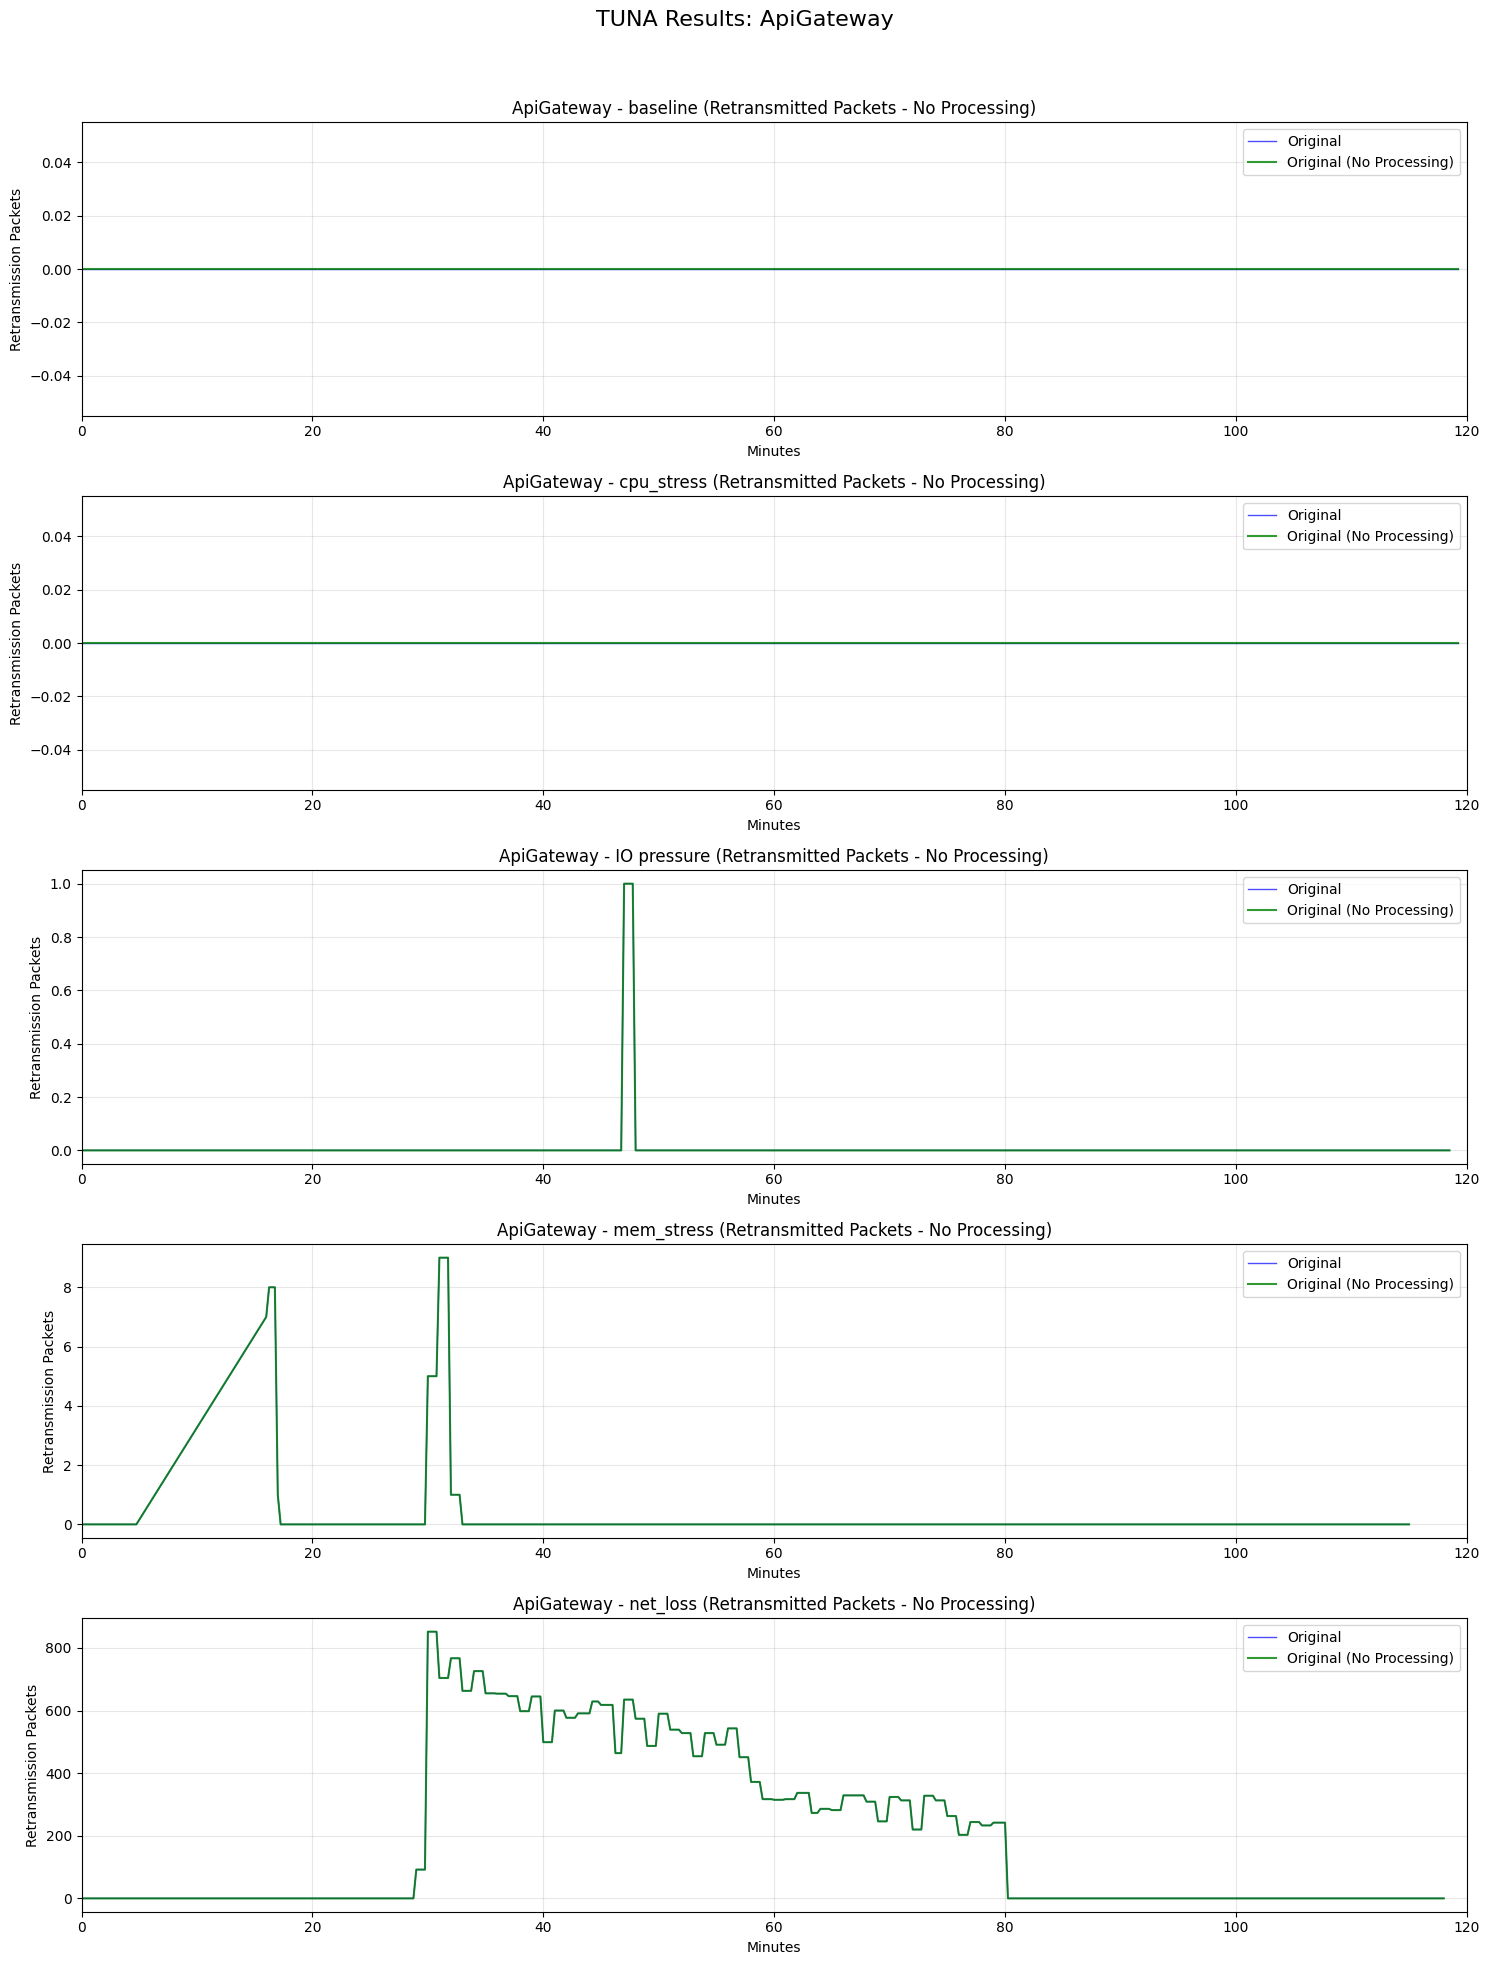

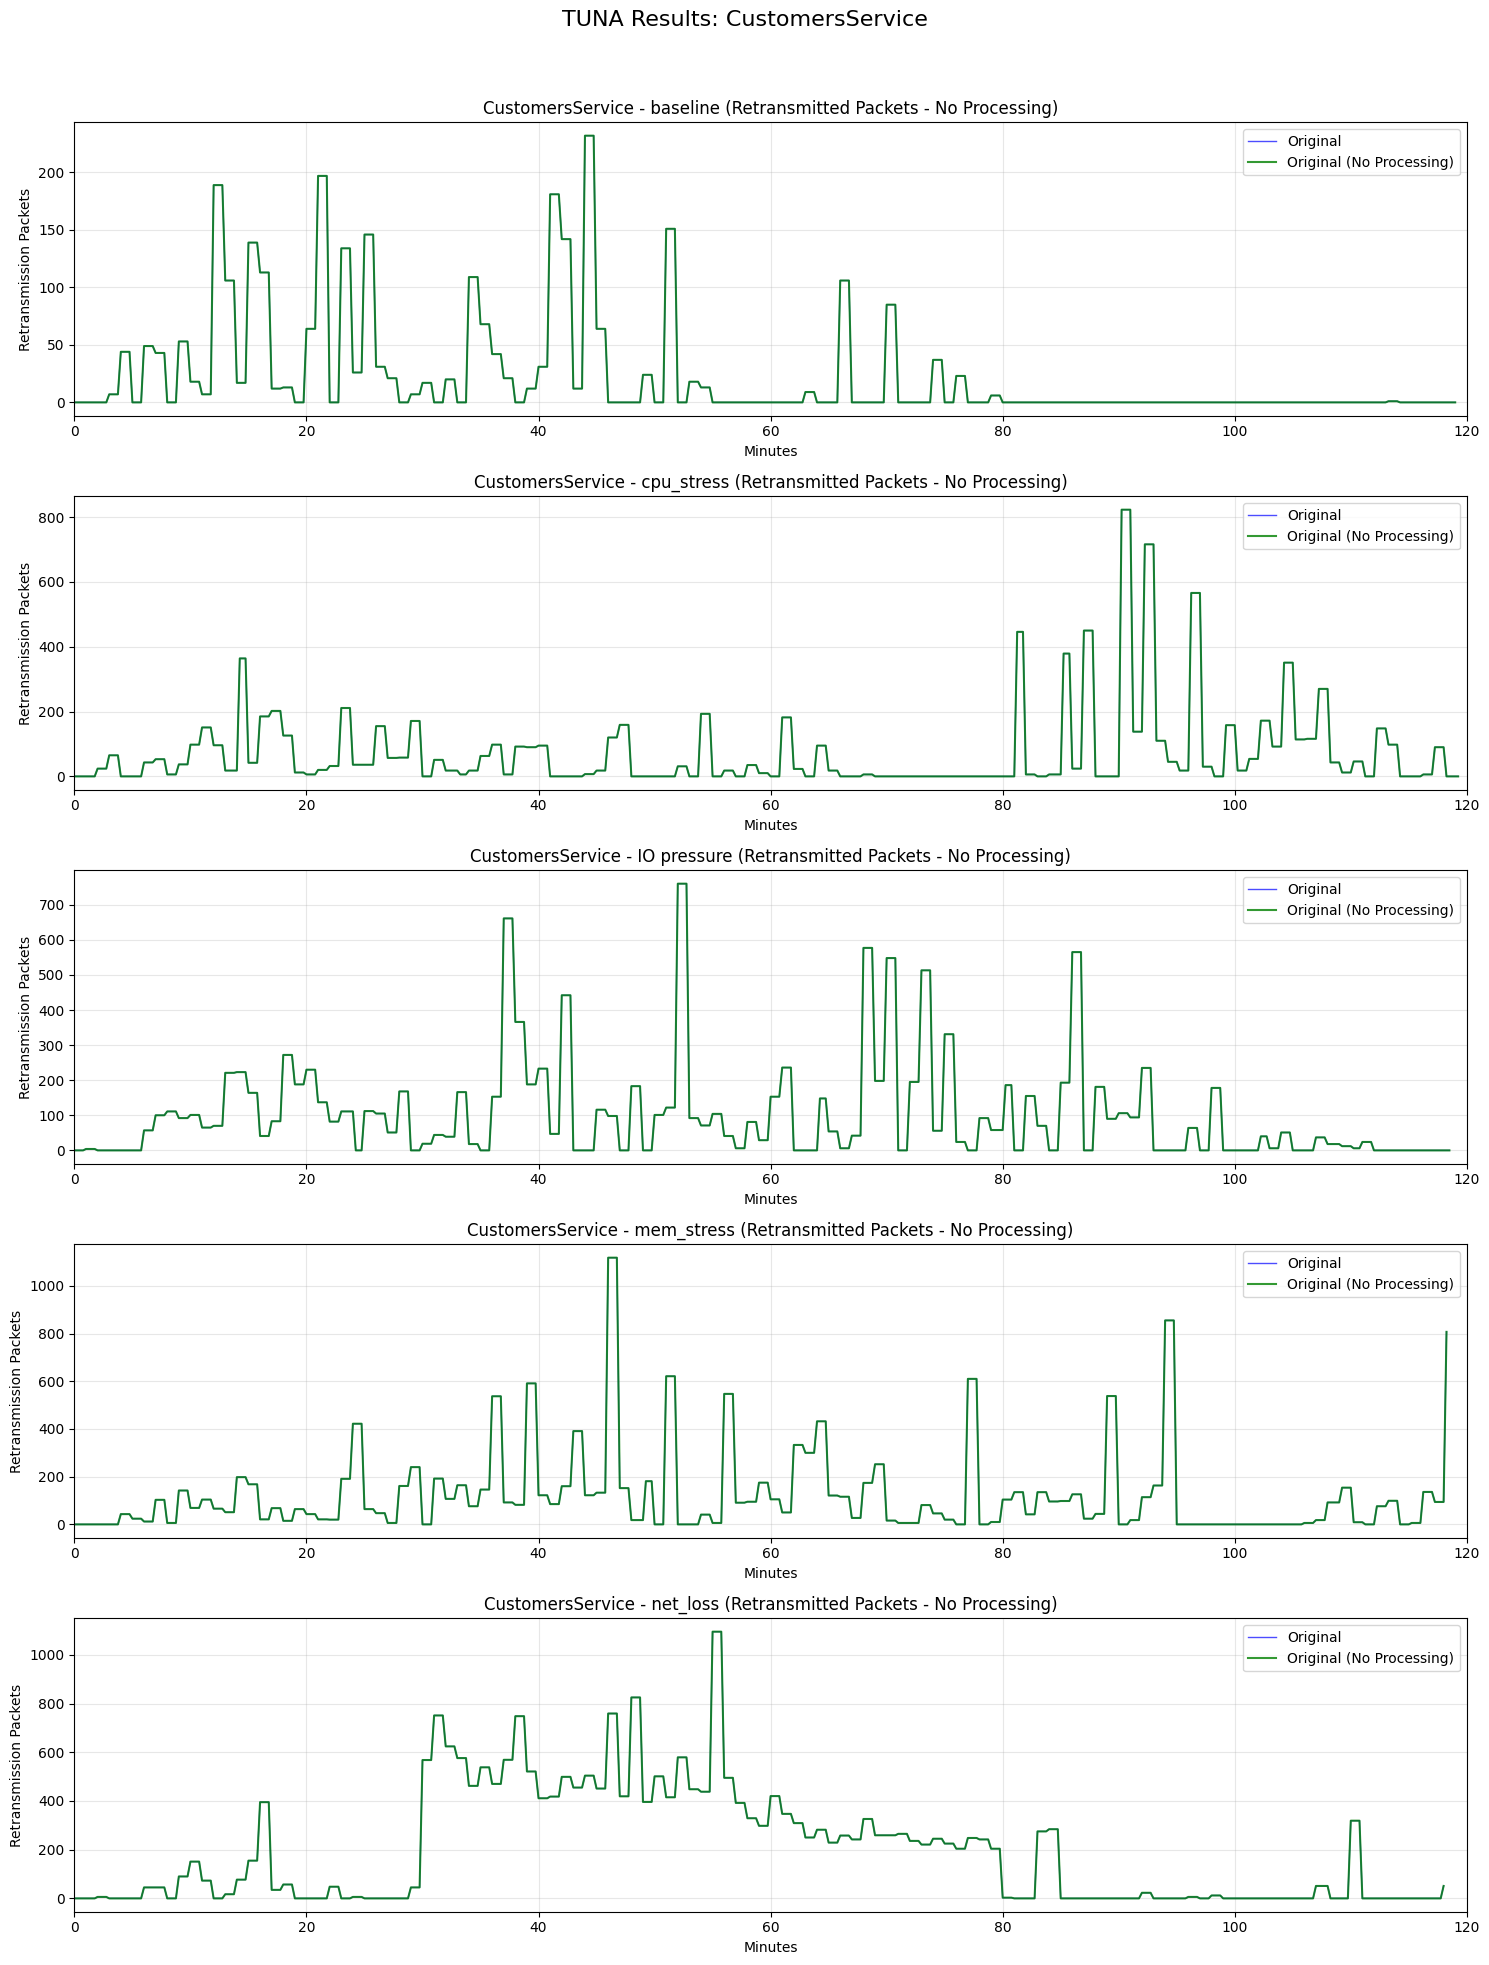

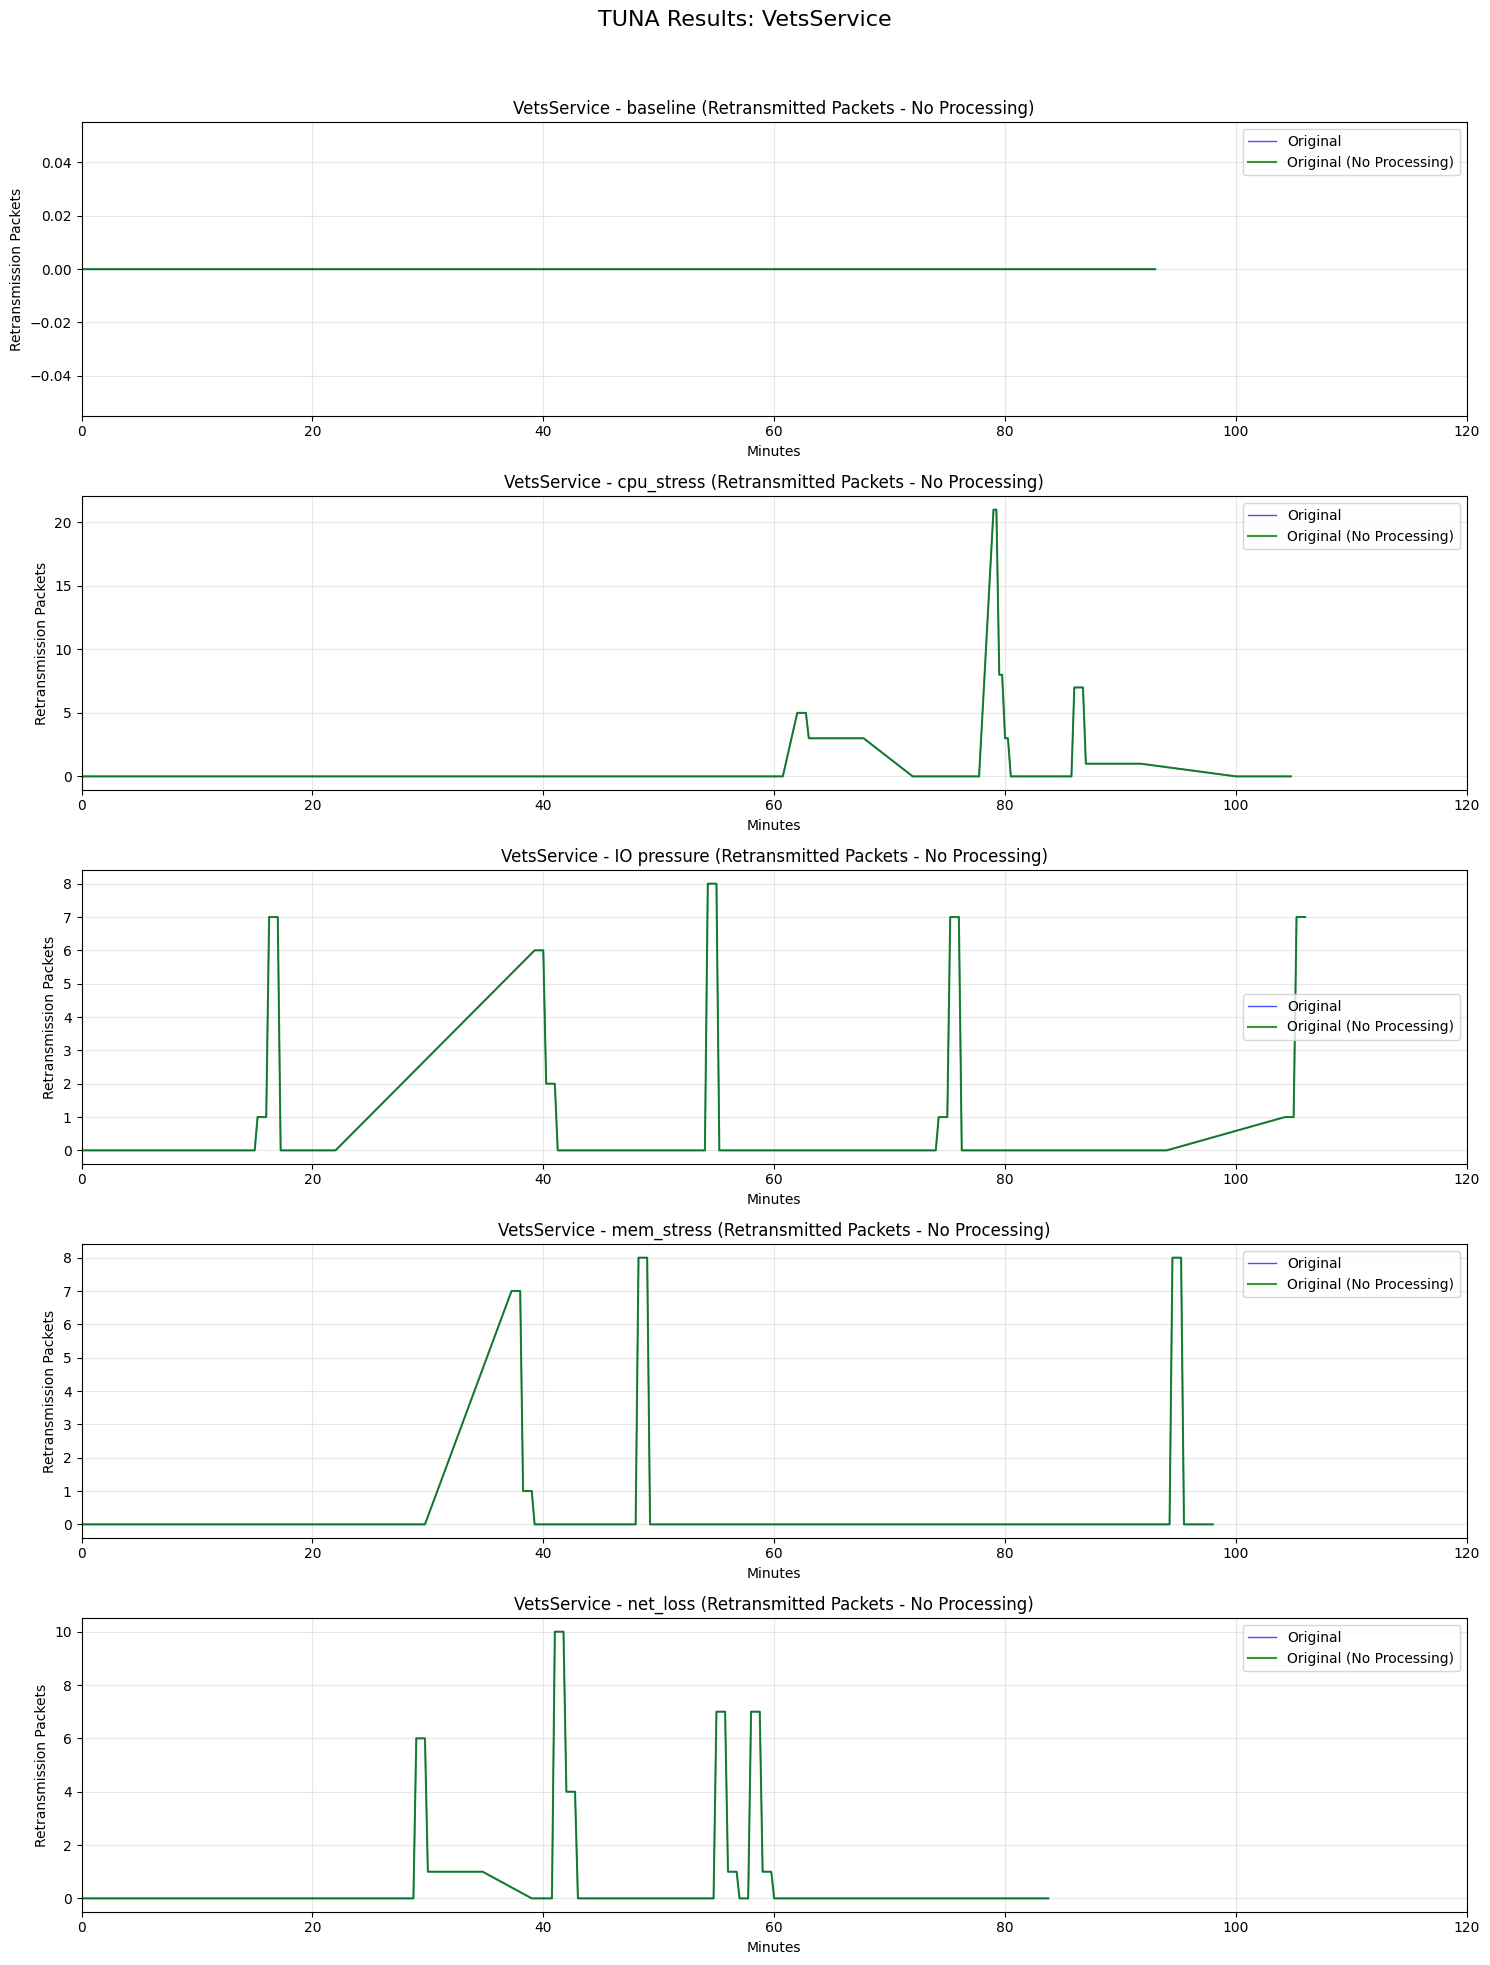

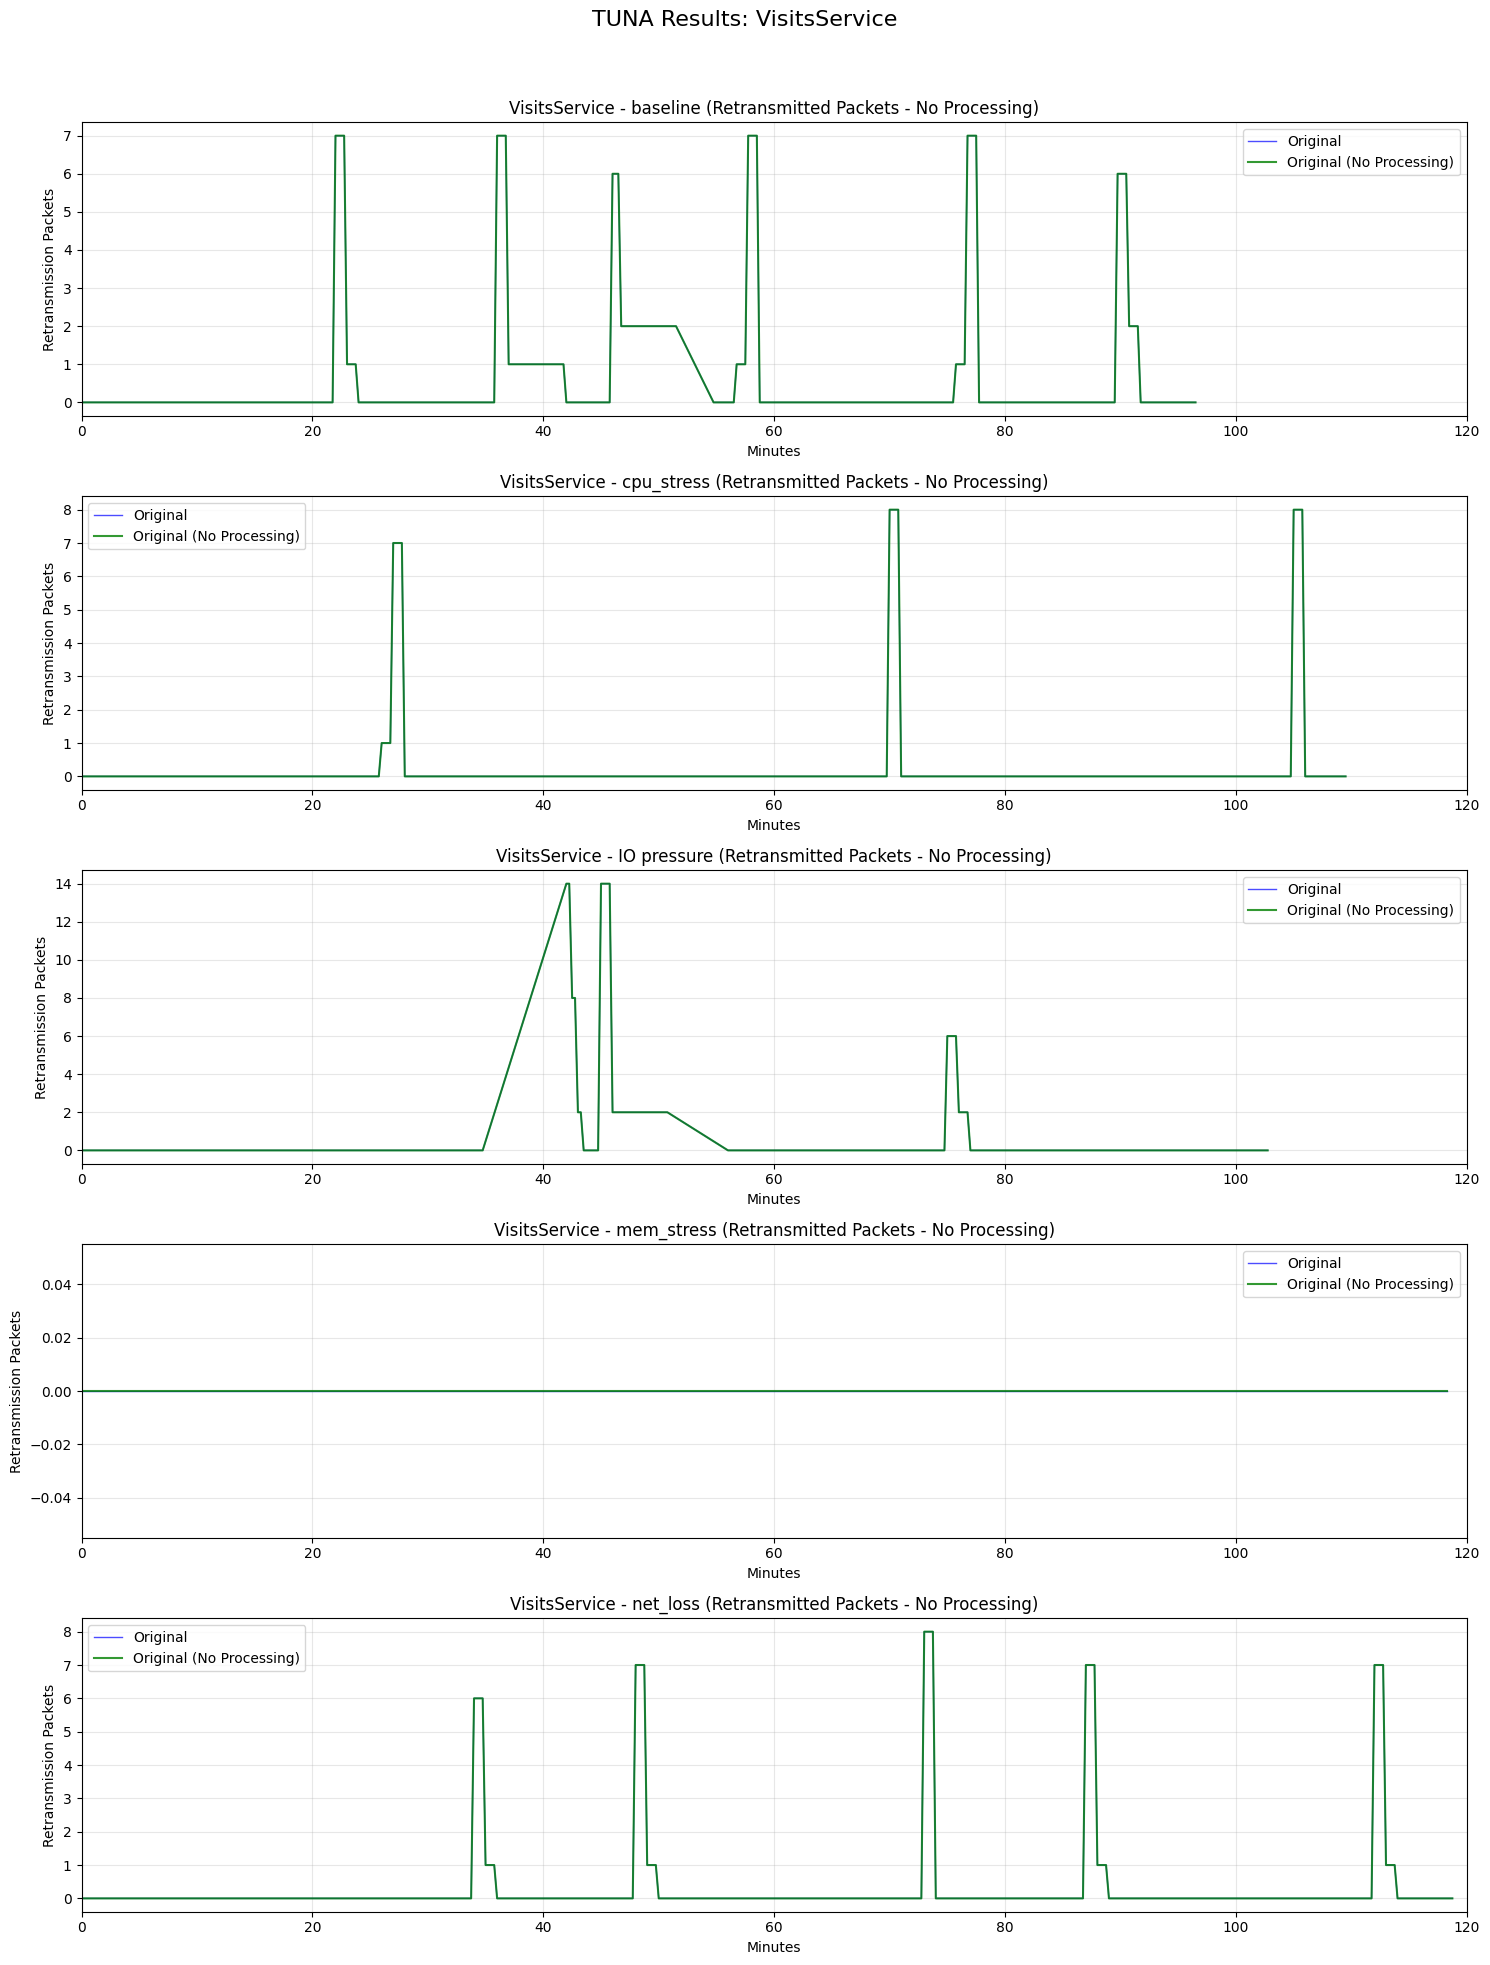

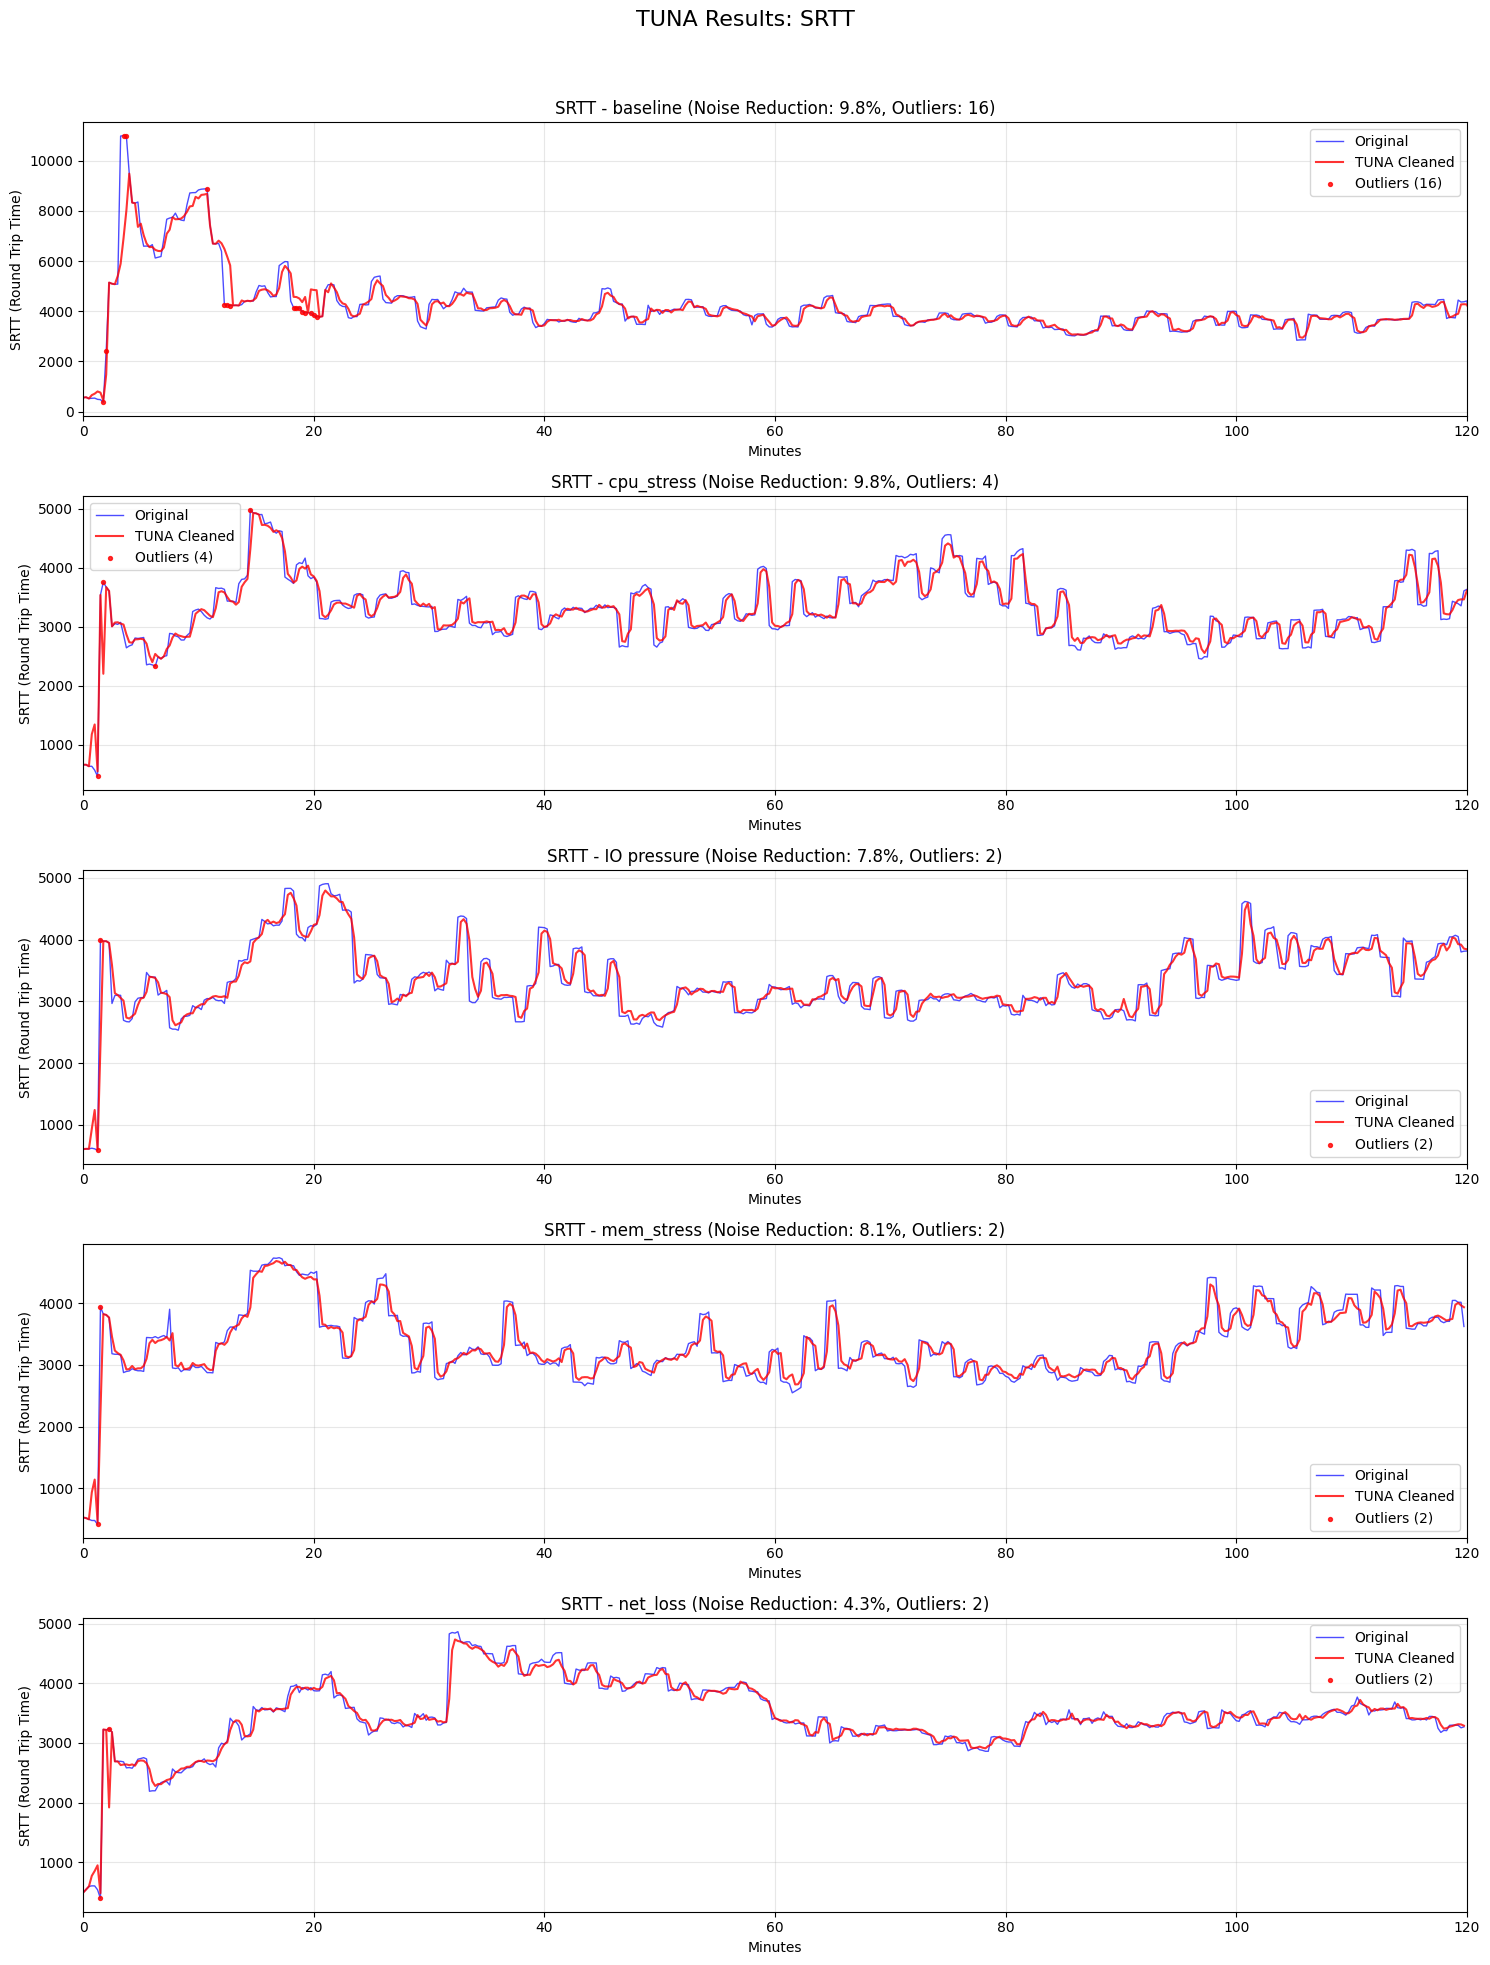


TUNA Results Summary:
Metric          Experiment      Outliers   Noise Red%   Correlation 
----------------------------------------------------------------------
ApiGateway      baseline        0                 0.0%       1.000
ApiGateway      cpu_stress      0                 0.0%       1.000
ApiGateway      IO pressure     0                 0.0%       1.000
ApiGateway      mem_stress      0                 0.0%       1.000
ApiGateway      net_loss        0                 0.0%       1.000
CustomersService baseline        0                 0.0%       1.000
CustomersService cpu_stress      0                 0.0%       1.000
CustomersService IO pressure     0                 0.0%       1.000
CustomersService mem_stress      0                 0.0%       1.000
CustomersService net_loss        0                 0.0%       1.000
VetsService     baseline        0                 0.0%       1.000
VetsService     cpu_stress      0                 0.0%       1.000
VetsService     IO pressure 

In [2]:
def safe_convert_to_float(series):
    try:
        return pd.to_numeric(series, errors='coerce').fillna(0.0).astype(float)
    except:
        return series.fillna(0.0).astype(float)

def safe_array_conversion(data):
    data = np.array(data, dtype=float)
    if np.any(np.isnan(data)):
        data = np.nan_to_num(data, nan=0.0)
    return data

def extract_tcp_values(df, metric_name):
    exclude_cols = ['Time', 'Minutes', 'source']
    value_cols = [col for col in df.columns if col not in exclude_cols]
    
    if len(value_cols) == 1:
        return safe_convert_to_float(df[value_cols[0]])
    else:
        return df[value_cols].fillna(0.0).sum(axis=1).values

def get_tuna_parameters(metric_name, experiment_type):
    """Get consistent TUNA parameters for TCP metrics using memory logic"""
    
    if "srtt" in metric_name.lower():
        window_size = 40
        threshold = 0.8
    
    min_absolute_range_factor = 0.2
    penalty_factor = 0.5
    lookback_window = 12
    
    return {
        'window_size': window_size,
        'threshold': threshold,
        'min_absolute_range_factor': min_absolute_range_factor,
        'penalty_factor': penalty_factor,
        'lookback_window': lookback_window
    }

def detect_outliers_tuna_memory(timeseries, metric_name="", experiment_type=""):
    """TUNA's relative range outlier detection with MIN/MAX marking - Memory Logic"""
    
    timeseries = safe_array_conversion(timeseries)
    outlier_mask = np.zeros(len(timeseries), dtype=bool)
    params = get_tuna_parameters(metric_name, experiment_type)
    
    window_size = params['window_size']
    threshold = params['threshold']
    min_absolute_range = params['min_absolute_range_factor'] * np.std(timeseries)
    
    for i in range(0, len(timeseries) - window_size + 1, 1):
        window = timeseries[i:i + window_size]
        window_mean = np.mean(window)
        window_range = np.max(window) - np.min(window)
        
        if window_mean > 0:
            relative_range = window_range / window_mean
            
            if relative_range > threshold and window_range > min_absolute_range:
                window_max = np.max(window)
                window_min = np.min(window)
                
                for j in range(window_size):
                    actual_idx = i + j
                    if actual_idx < len(timeseries):
                        if (timeseries[actual_idx] == window_max or 
                            timeseries[actual_idx] == window_min):
                            outlier_mask[actual_idx] = True
    
    return outlier_mask

def get_local_stable_baseline(timeseries, stable_mask, current_idx, lookback_window):
    """Get local baseline from recent stable points - Memory logic"""
    
    start_idx = max(0, current_idx - lookback_window)
    local_window = timeseries[start_idx:current_idx]
    local_stable_mask = stable_mask[start_idx:current_idx]
    
    recent_stable = local_window[local_stable_mask]
    
    if len(recent_stable) >= 3:
        return np.median(recent_stable)
    elif len(recent_stable) >= 1:
        return np.mean(recent_stable)
    
    end_idx = min(len(timeseries), current_idx + lookback_window)
    forward_window = timeseries[current_idx+1:end_idx]
    forward_stable_mask = stable_mask[current_idx+1:end_idx]
    
    forward_stable = forward_window[forward_stable_mask]
    
    if len(forward_stable) >= 1:
        return np.median(forward_stable) if len(forward_stable) >= 3 else np.mean(forward_stable)
    
    stable_values = timeseries[stable_mask]
    return np.median(stable_values) if len(stable_values) > 0 else np.median(timeseries)

def apply_penalty_local_trend(timeseries, outlier_mask, metric_name="", experiment_type=""):
    """Apply penalty based on local stable trend - Memory logic"""
    
    timeseries = safe_array_conversion(timeseries)
    cleaned_series = timeseries.copy()
    stable_mask = ~outlier_mask
    params = get_tuna_parameters(metric_name, experiment_type)
    
    effective_penalty = params['penalty_factor']
    lookback_window = params['lookback_window']
    
    for i in range(len(timeseries)):
        if outlier_mask[i]:
            local_baseline = get_local_stable_baseline(timeseries, stable_mask, i, lookback_window)
            original_value = timeseries[i]
            deviation = original_value - local_baseline
            cleaned_series[i] = local_baseline + deviation * effective_penalty
    
    return cleaned_series

def create_features_for_ml(timeseries, stable_mask, experiment_type):
    """Create features ONLY from stable regions - Memory logic"""
    
    timeseries = safe_array_conversion(timeseries)
    features = []
    feature_indices = []
    window_size = 3
    
    for i in range(window_size, len(timeseries)):
        if stable_mask[i]:
            window = timeseries[i-window_size:i]
            window_stable_mask = stable_mask[i-window_size:i]
            
            stable_ratio = np.sum(window_stable_mask) / len(window_stable_mask)
            if stable_ratio >= 0.8:
                stable_window = window[window_stable_mask]
                
                if len(stable_window) > 0:
                    feature_vector = [
                        np.mean(stable_window),
                        np.std(stable_window),
                        np.median(stable_window),
                        np.max(stable_window) - np.min(stable_window),
                        timeseries[i-1] if stable_mask[i-1] else np.mean(stable_window),
                        i / len(timeseries),
                    ]
                    
                    feature_vector = [0.0 if np.isnan(val) or np.isinf(val) else float(val) for val in feature_vector]
                    
                    exp_features = [0, 0, 0, 0, 0]
                    if experiment_type == "baseline":
                        exp_features[0] = 1
                    elif experiment_type == "cpu_stress":
                        exp_features[1] = 1
                    elif experiment_type == "delay":
                        exp_features[2] = 1
                    elif experiment_type == "mem_stress":
                        exp_features[3] = 1
                    elif experiment_type == "net_loss":
                        exp_features[4] = 1
                    
                    feature_vector.extend(exp_features)
                    features.append(feature_vector)
                    feature_indices.append(i)
    
    return np.array(features), np.array(feature_indices)

def train_models_for_all_columns(metric_name, all_experiments):
    """Train RandomForest models using stable periods - Only for SRTT"""
    
    if not should_apply_tuna(metric_name):
        return None, None
    
    X_stable_all = []
    y_stable_all = []
    
    for exp_name, df in all_experiments.items():
        tcp_values = extract_tcp_values(df, metric_name)
        tcp_values = safe_array_conversion(tcp_values)
        
        outlier_mask = detect_outliers_tuna_memory(tcp_values, metric_name=metric_name, experiment_type=exp_name)
        stable_mask = ~outlier_mask
        
        features, feature_indices = create_features_for_ml(tcp_values, stable_mask, exp_name)
        
        if len(features) > 0:
            stable_targets = tcp_values[feature_indices]
            
            valid_mask = ~(np.isnan(stable_targets) | np.isinf(stable_targets))
            stable_features = features[valid_mask]
            stable_targets = stable_targets[valid_mask]
            
            if len(stable_features) > 0:
                smoothed_targets = []
                for j, target in enumerate(stable_targets):
                    start_idx = max(0, j-2)
                    end_idx = min(len(stable_targets), j+3)
                    local_values = stable_targets[start_idx:end_idx]
                    smoothed_targets.append(np.median(local_values))
                
                X_stable_all.extend(stable_features)
                y_stable_all.extend(smoothed_targets)
    
    if len(X_stable_all) >= 10:
        X_stable_all = np.array(X_stable_all)
        y_stable_all = np.array(y_stable_all)
        
        nan_mask = np.isnan(y_stable_all) | np.isinf(y_stable_all)
        if np.any(nan_mask):
            X_stable_all = X_stable_all[~nan_mask]
            y_stable_all = y_stable_all[~nan_mask]
        
        feature_nan_mask = np.isnan(X_stable_all).any(axis=1) | np.isinf(X_stable_all).any(axis=1)
        if np.any(feature_nan_mask):
            X_stable_all = X_stable_all[~feature_nan_mask]
            y_stable_all = y_stable_all[~feature_nan_mask]
        
        if len(X_stable_all) >= 10:
            try:
                scaler = StandardScaler()
                X_scaled = scaler.fit_transform(X_stable_all)
                
                param_grid = {
                    'n_estimators': [100],
                    'max_depth': [5, 10, 15],
                    'min_samples_split': [2, 5],
                    'min_samples_leaf': [1, 2, 4],
                    'max_features': ['sqrt', 'log2']
                }
                
                model = RandomForestRegressor(
                    criterion='squared_error',
                    bootstrap=True,
                    n_jobs=-1,
                    random_state=42
                )
                
                grid_search = GridSearchCV(
                    estimator=model,
                    param_grid=param_grid,
                    scoring='neg_mean_squared_error',
                    cv=3,
                    n_jobs=-1,
                    verbose=0
                )
                
                grid_search.fit(X_scaled, y_stable_all)
                return grid_search.best_estimator_, scaler
            except Exception:
                return None, None
    
    return None, None

def should_apply_tuna(metric_name):
    """Determines if TUNA should be applied - only to SRTT"""
    return 'srtt' in metric_name.lower()

def apply_tuna_to_single_series(tcp_values, exp_name, model, scaler, metric_name=""):
    """Apply TUNA cleaning to a single series - Only for SRTT"""
    
    tcp_values = safe_array_conversion(tcp_values)
    
    if not should_apply_tuna(metric_name):
        outlier_mask = np.zeros(len(tcp_values), dtype=bool)
        cleaning_stats = {
            'outliers': 0,
            'noise_reduction': 0.0,
            'correlation': 1.0,
            'tuna_applied': False
        }
        return tcp_values, outlier_mask, cleaning_stats
    
    outlier_mask = detect_outliers_tuna_memory(tcp_values, metric_name=metric_name, experiment_type=exp_name)
    stable_mask = ~outlier_mask
    outliers_count = np.sum(outlier_mask)
    
    cleaned_series = tcp_values.copy()
    if outliers_count > 0:
        cleaned_series = apply_penalty_local_trend(tcp_values, outlier_mask, metric_name, exp_name)
    
    if model is not None and scaler is not None:
        features, feature_indices = create_features_for_ml(tcp_values, stable_mask, exp_name)
        
        if len(features) > 0:
            try:
                features_scaled = scaler.transform(features)
                ml_predictions = model.predict(features_scaled)
                
                for i, prediction in enumerate(ml_predictions):
                    actual_idx = feature_indices[i]
                    if actual_idx < len(cleaned_series) and stable_mask[actual_idx]:
                        if not np.isnan(prediction) and not np.isinf(prediction):
                            cleaned_series[actual_idx] = prediction
            except Exception:
                pass
    
    original_std = np.std(tcp_values)
    cleaned_std = np.std(cleaned_series)
    noise_reduction = (original_std - cleaned_std) / original_std * 100 if original_std > 0 else 0
    correlation = np.corrcoef(tcp_values, cleaned_series)[0, 1] if len(tcp_values) > 1 else 1.0
    
    if np.isnan(correlation):
        correlation = 1.0
    
    cleaning_stats = {
        'outliers': outliers_count,
        'noise_reduction': noise_reduction,
        'correlation': correlation,
        'tuna_applied': True
    }
    
    return cleaned_series, outlier_mask, cleaning_stats

def run_tuna_analysis(all_datasets):
    """Run TUNA analysis on all datasets - Export ALL metrics, process only those with variance"""
    
    tuna_results = {}
    
    for metric_name, experiments in all_datasets.items():
        print(f"🔧 Processing {metric_name}...")
        
        # Step 1: Check which experiments have variance (for TUNA processing if applicable)
        valid_experiments = {}
        for exp_name, df in experiments.items():
            tcp_values = extract_tcp_values(df, metric_name)
            has_variance = (np.std(tcp_values) > 0 and len(np.unique(tcp_values)) > 1)
            if has_variance:
                valid_experiments[exp_name] = df
        
        # Step 2: Train models only if we have valid experiments AND it's SRTT
        models, scalers = None, None
        if valid_experiments and should_apply_tuna(metric_name):
            models, scalers = train_models_for_all_columns(metric_name, valid_experiments)
            print(f"  📊 Trained models for {metric_name} using {len(valid_experiments)} experiments")
        
        # Step 3: Process ALL experiments (both with and without variance)
        metric_results = {}
        for exp_name, df in experiments.items():
            tcp_values = extract_tcp_values(df, metric_name)
            
            if exp_name in valid_experiments:
                # Has variance - apply TUNA if applicable
                cleaned_series, outlier_mask, stats = apply_tuna_to_single_series(
                    tcp_values, exp_name, models, scalers, metric_name=metric_name
                )
                
                metric_results[exp_name] = {
                    'original': tcp_values,
                    'cleaned': cleaned_series,
                    'outliers': outlier_mask,
                    'stats': stats
                }
                processing_type = "TUNA-processed" if stats.get('tuna_applied', False) else "Original"
                print(f"    ✅ {exp_name}: {processing_type}")
            else:
                # No variance - export as original
                metric_results[exp_name] = {
                    'original': tcp_values,
                    'cleaned': tcp_values.copy(),  # Same as original
                    'outliers': np.zeros(len(tcp_values), dtype=bool),
                    'stats': {
                        'outliers': 0,
                        'noise_reduction': 0.0,
                        'correlation': 1.0,
                        'tuna_applied': False
                    }
                }
                print(f"    ✅ {exp_name}: Original (no variance)")
        
        # Step 4: Always add to results (even if no variance)
        if metric_results:
            tuna_results[metric_name] = metric_results
            print(f"  ✅ {metric_name}: Added {len(metric_results)} experiments to results")
        else:
            print(f"  ❌ {metric_name}: No experiments found")
    
    return tuna_results

def plot_tuna_results(tuna_results, all_datasets):
    """Plot TUNA results"""
    
    for metric_name, metric_results in tuna_results.items():
        n_experiments = len(metric_results)
        fig, axes = plt.subplots(n_experiments, 1, figsize=(15, 4*n_experiments))
        
        if n_experiments == 1:
            axes = [axes]
        
        for i, (exp_name, results) in enumerate(metric_results.items()):
            original = results['original']
            cleaned = results['cleaned']
            outliers = results['outliers']
            stats = results['stats']
            
            df = all_datasets[metric_name][exp_name]
            minutes = df['Minutes'].values
            
            if stats.get('tuna_applied', False):
                cleaned_color = 'r-'
                cleaned_label = 'TUNA Cleaned'
                title_suffix = f"(Noise Reduction: {stats['noise_reduction']:.1f}%, Outliers: {stats['outliers']})"
            else:
                cleaned_color = 'g-'
                cleaned_label = 'Original (No Processing)'
                title_suffix = "(Retransmitted Packets - No Processing)"
            
            axes[i].plot(minutes, original, 'b-', alpha=0.7, label='Original', linewidth=1)
            axes[i].plot(minutes, cleaned, cleaned_color, alpha=0.8, label=cleaned_label, linewidth=1.5)
            
            if stats.get('tuna_applied', False) and np.any(outliers):
                outlier_minutes = minutes[outliers]
                outlier_original_values = original[outliers]
                axes[i].scatter(outlier_minutes, outlier_original_values, 
                               color='red', s=8, alpha=0.8, marker='o', 
                               label=f'Outliers ({np.sum(outliers)})', zorder=5)
            
            if 'srtt' in metric_name.lower():
                y_label = 'SRTT (Round Trip Time)'
            elif any(service in metric_name.lower() for service in ['apigateway', 'customers', 'visits', 'vets']):
                y_label = 'Retransmission Packets'
            else:
                y_label = 'TCP Values'
            
            axes[i].set_title(f'{metric_name} - {exp_name} {title_suffix}')
            axes[i].set_xlabel('Minutes')
            axes[i].set_ylabel(y_label)
            axes[i].set_xlim(0, 120)
            axes[i].legend()
            axes[i].grid(True, alpha=0.3)
        
        plt.suptitle(f'TUNA Results: {metric_name}', fontsize=16, y=0.98)
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

def print_tuna_summary(tuna_results):
    """Print TUNA summary"""
    
    print(f"\nTUNA Results Summary:")
    print("="*70)
    print(f"{'Metric':<15} {'Experiment':<15} {'Outliers':<10} {'Noise Red%':<12} {'Correlation':<12}")
    print("-"*70)
    
    for metric_name, metric_results in tuna_results.items():
        for exp_name, results in metric_results.items():
            stats = results['stats']
            print(f"{metric_name:<15} {exp_name:<15} {stats['outliers']:<10} "
                  f"{stats['noise_reduction']:>10.1f}% {stats['correlation']:>11.3f}")

def create_cleaned_csv_from_tuna(original_df, cleaned_series, outlier_mask, stats, metric_name, experiment_name, include_metadata=False):
    """Create cleaned CSV with NaN handling for retransmission packets"""
    
    exclude_cols = ['Time', 'Minutes', 'source']
    value_cols = [col for col in original_df.columns if col not in exclude_cols]
    
    if not stats.get('tuna_applied', False):
        cleaned_df = original_df.copy()
        
        for col in value_cols:
            cleaned_df[col] = cleaned_df[col].fillna(0.0)
        
        if include_metadata:
            cleaned_df['tuna_processed'] = False
            cleaned_df['tuna_applied'] = False
            cleaned_df['tuna_metric_name'] = metric_name
            cleaned_df['tuna_experiment'] = experiment_name
            cleaned_df['data_type'] = 'retransmitted_packets'
        return cleaned_df
    
    if len(value_cols) == 1:
        cleaned_df = original_df.copy()
        cleaned_df[value_cols[0]] = cleaned_series[:len(cleaned_df)]
    else:
        if 'srtt' in metric_name.lower():
            cleaned_df = original_df[['Time', 'Minutes', 'source']].copy()
            cleaned_df[f'{metric_name}_cumulative'] = cleaned_series[:len(cleaned_df)]
        else:
            cleaned_df = original_df.copy()
            
            for col in value_cols:
                cleaned_df[col] = cleaned_df[col].fillna(0.0)
            
            original_sum = original_df[value_cols].fillna(0.0).sum(axis=1).values
            ratio = cleaned_series / (original_sum + 1e-10)
            
            for col in value_cols:
                cleaned_df[col] = original_df[col].fillna(0.0) * ratio
    
    if include_metadata:
        cleaned_df['tuna_processed'] = True
        cleaned_df['tuna_applied'] = True
        cleaned_df['tuna_outliers'] = stats['outliers']
        cleaned_df['tuna_noise_reduction'] = stats['noise_reduction']
        cleaned_df['tuna_correlation'] = stats['correlation']
        cleaned_df['tuna_metric_name'] = metric_name
        cleaned_df['tuna_experiment'] = experiment_name
        cleaned_df['tuna_outlier_flag'] = outlier_mask[:len(cleaned_df)]
    
    return cleaned_df

def export_all_cleaned_csvs(tuna_results, all_datasets, output_base_path="cleaned_data", include_metadata=False):
    """Export all TUNA-cleaned datasets organized by experiment type"""
    
    output_base = Path(output_base_path)
    output_base.mkdir(parents=True, exist_ok=True)
    
    created_files = {}
    total_files = 0
    
    experiment_types = set()
    for metric_results in tuna_results.values():
        experiment_types.update(metric_results.keys())
    
    for exp_name in experiment_types:
        exp_dir = output_base / exp_name
        exp_dir.mkdir(exist_ok=True)
        created_files[exp_name] = []
    
    for metric_name, metric_results in tuna_results.items():
        for exp_name, results in metric_results.items():
            original_df = all_datasets[metric_name][exp_name]
            
            cleaned_series = results['cleaned']
            outlier_mask = results['outliers']
            tuna_stats = results['stats']
            
            cleaned_df = create_cleaned_csv_from_tuna(
                original_df=original_df,
                cleaned_series=cleaned_series,
                outlier_mask=outlier_mask,
                stats=tuna_stats,
                metric_name=metric_name,
                experiment_name=exp_name,
                include_metadata=include_metadata
            )
            
            csv_filename = f"tcp_{metric_name.lower()}.csv"
            csv_path = output_base / exp_name / csv_filename
            
            cleaned_df.to_csv(csv_path, index=False)
            created_files[exp_name].append(str(csv_path))
            total_files += 1
    
    return created_files

def export_tuna_data_to_csv(tuna_results, export_dir="../../noise_reduction_data"):
    """Export TUNA results to CSV"""
    
    os.makedirs(export_dir, exist_ok=True)
    export_data = []
    
    for metric_name, metric_data in tuna_results.items():
        for experiment_name, experiment_data in metric_data.items():
            if 'stats' in experiment_data:
                stats = experiment_data['stats']
                export_data.append({
                    'experiment_name': experiment_name,
                    'metric': metric_name,
                    'noise_reduction_pct': stats.get('noise_reduction', 0.0),
                    'correlation': stats.get('correlation', 1.0),
                    'outliers_removed': stats.get('outliers', 0),
                })
    
    csv_filename = "customers_tuna_tcp.csv"
    csv_path = os.path.join(export_dir, csv_filename)
    
    df_simple = pd.DataFrame(export_data)
    df_simple.to_csv(csv_path, index=False)
    return csv_path

# Usage with your exact data structure:
tuna_results = run_tuna_analysis(all_datasets)
plot_tuna_results(tuna_results, all_datasets)
print_tuna_summary(tuna_results)
csv_path = export_tuna_data_to_csv(tuna_results)
cleaned_files = export_all_cleaned_csvs(tuna_results, all_datasets)

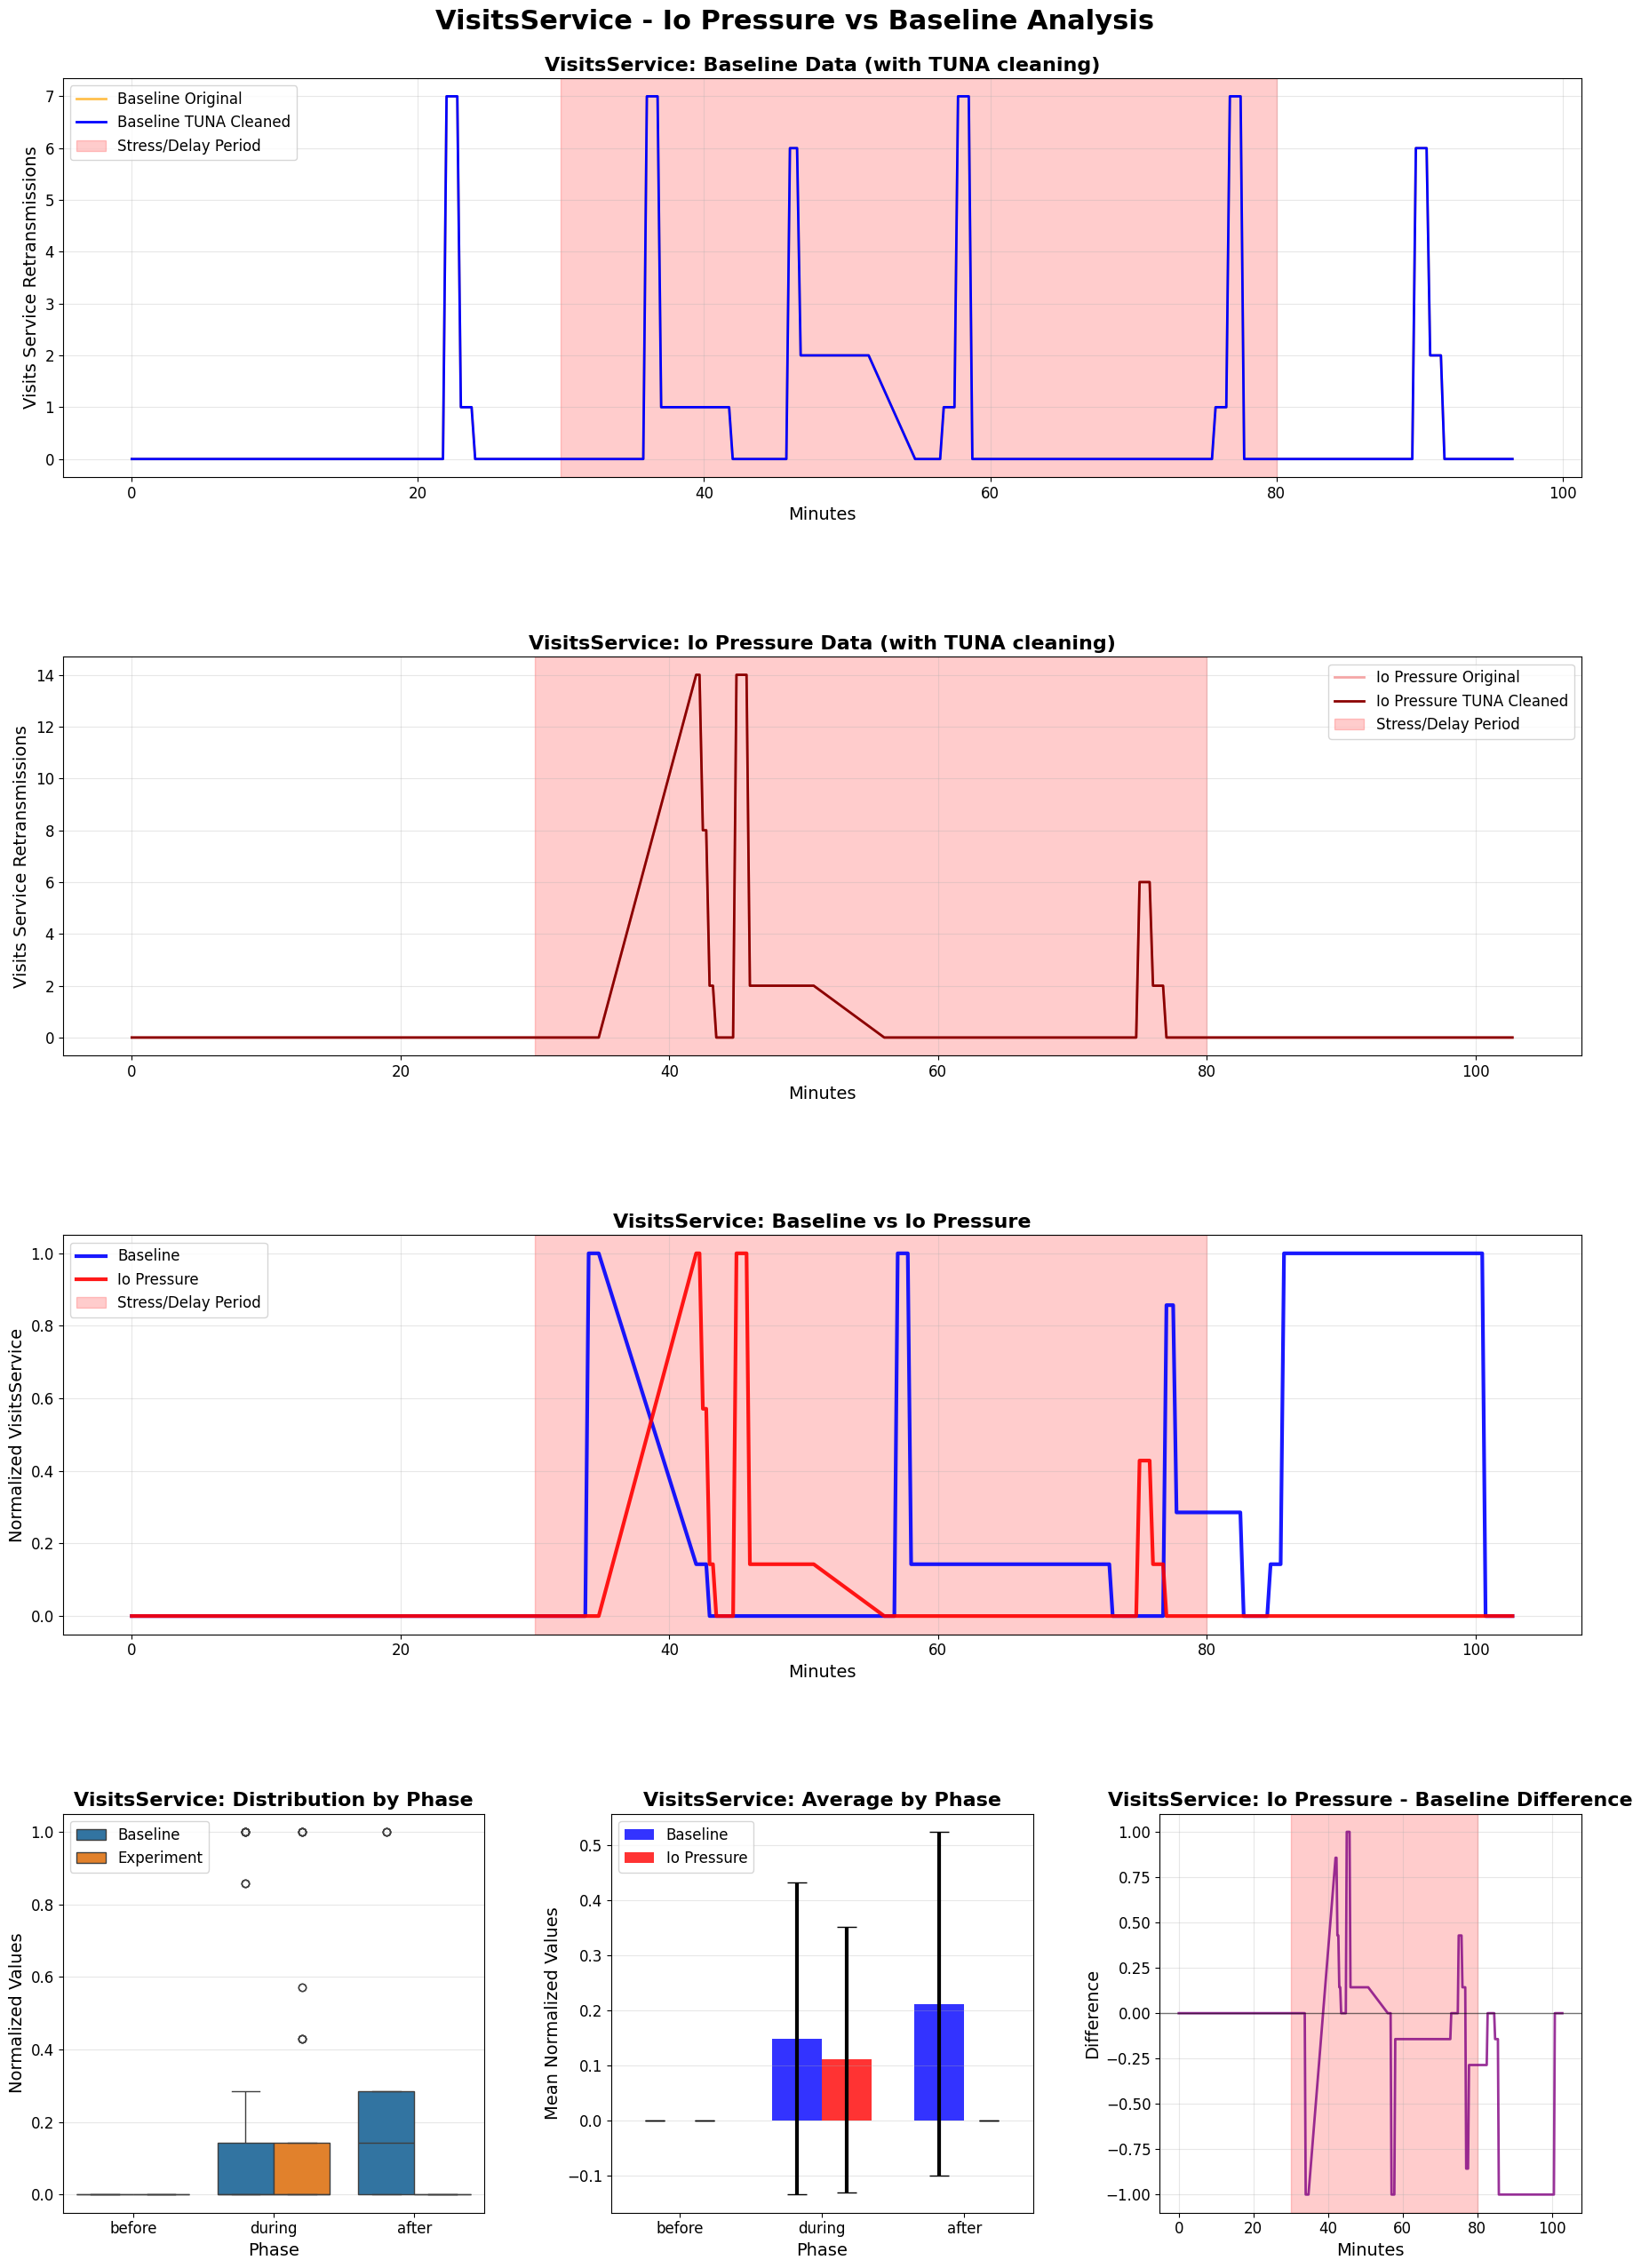

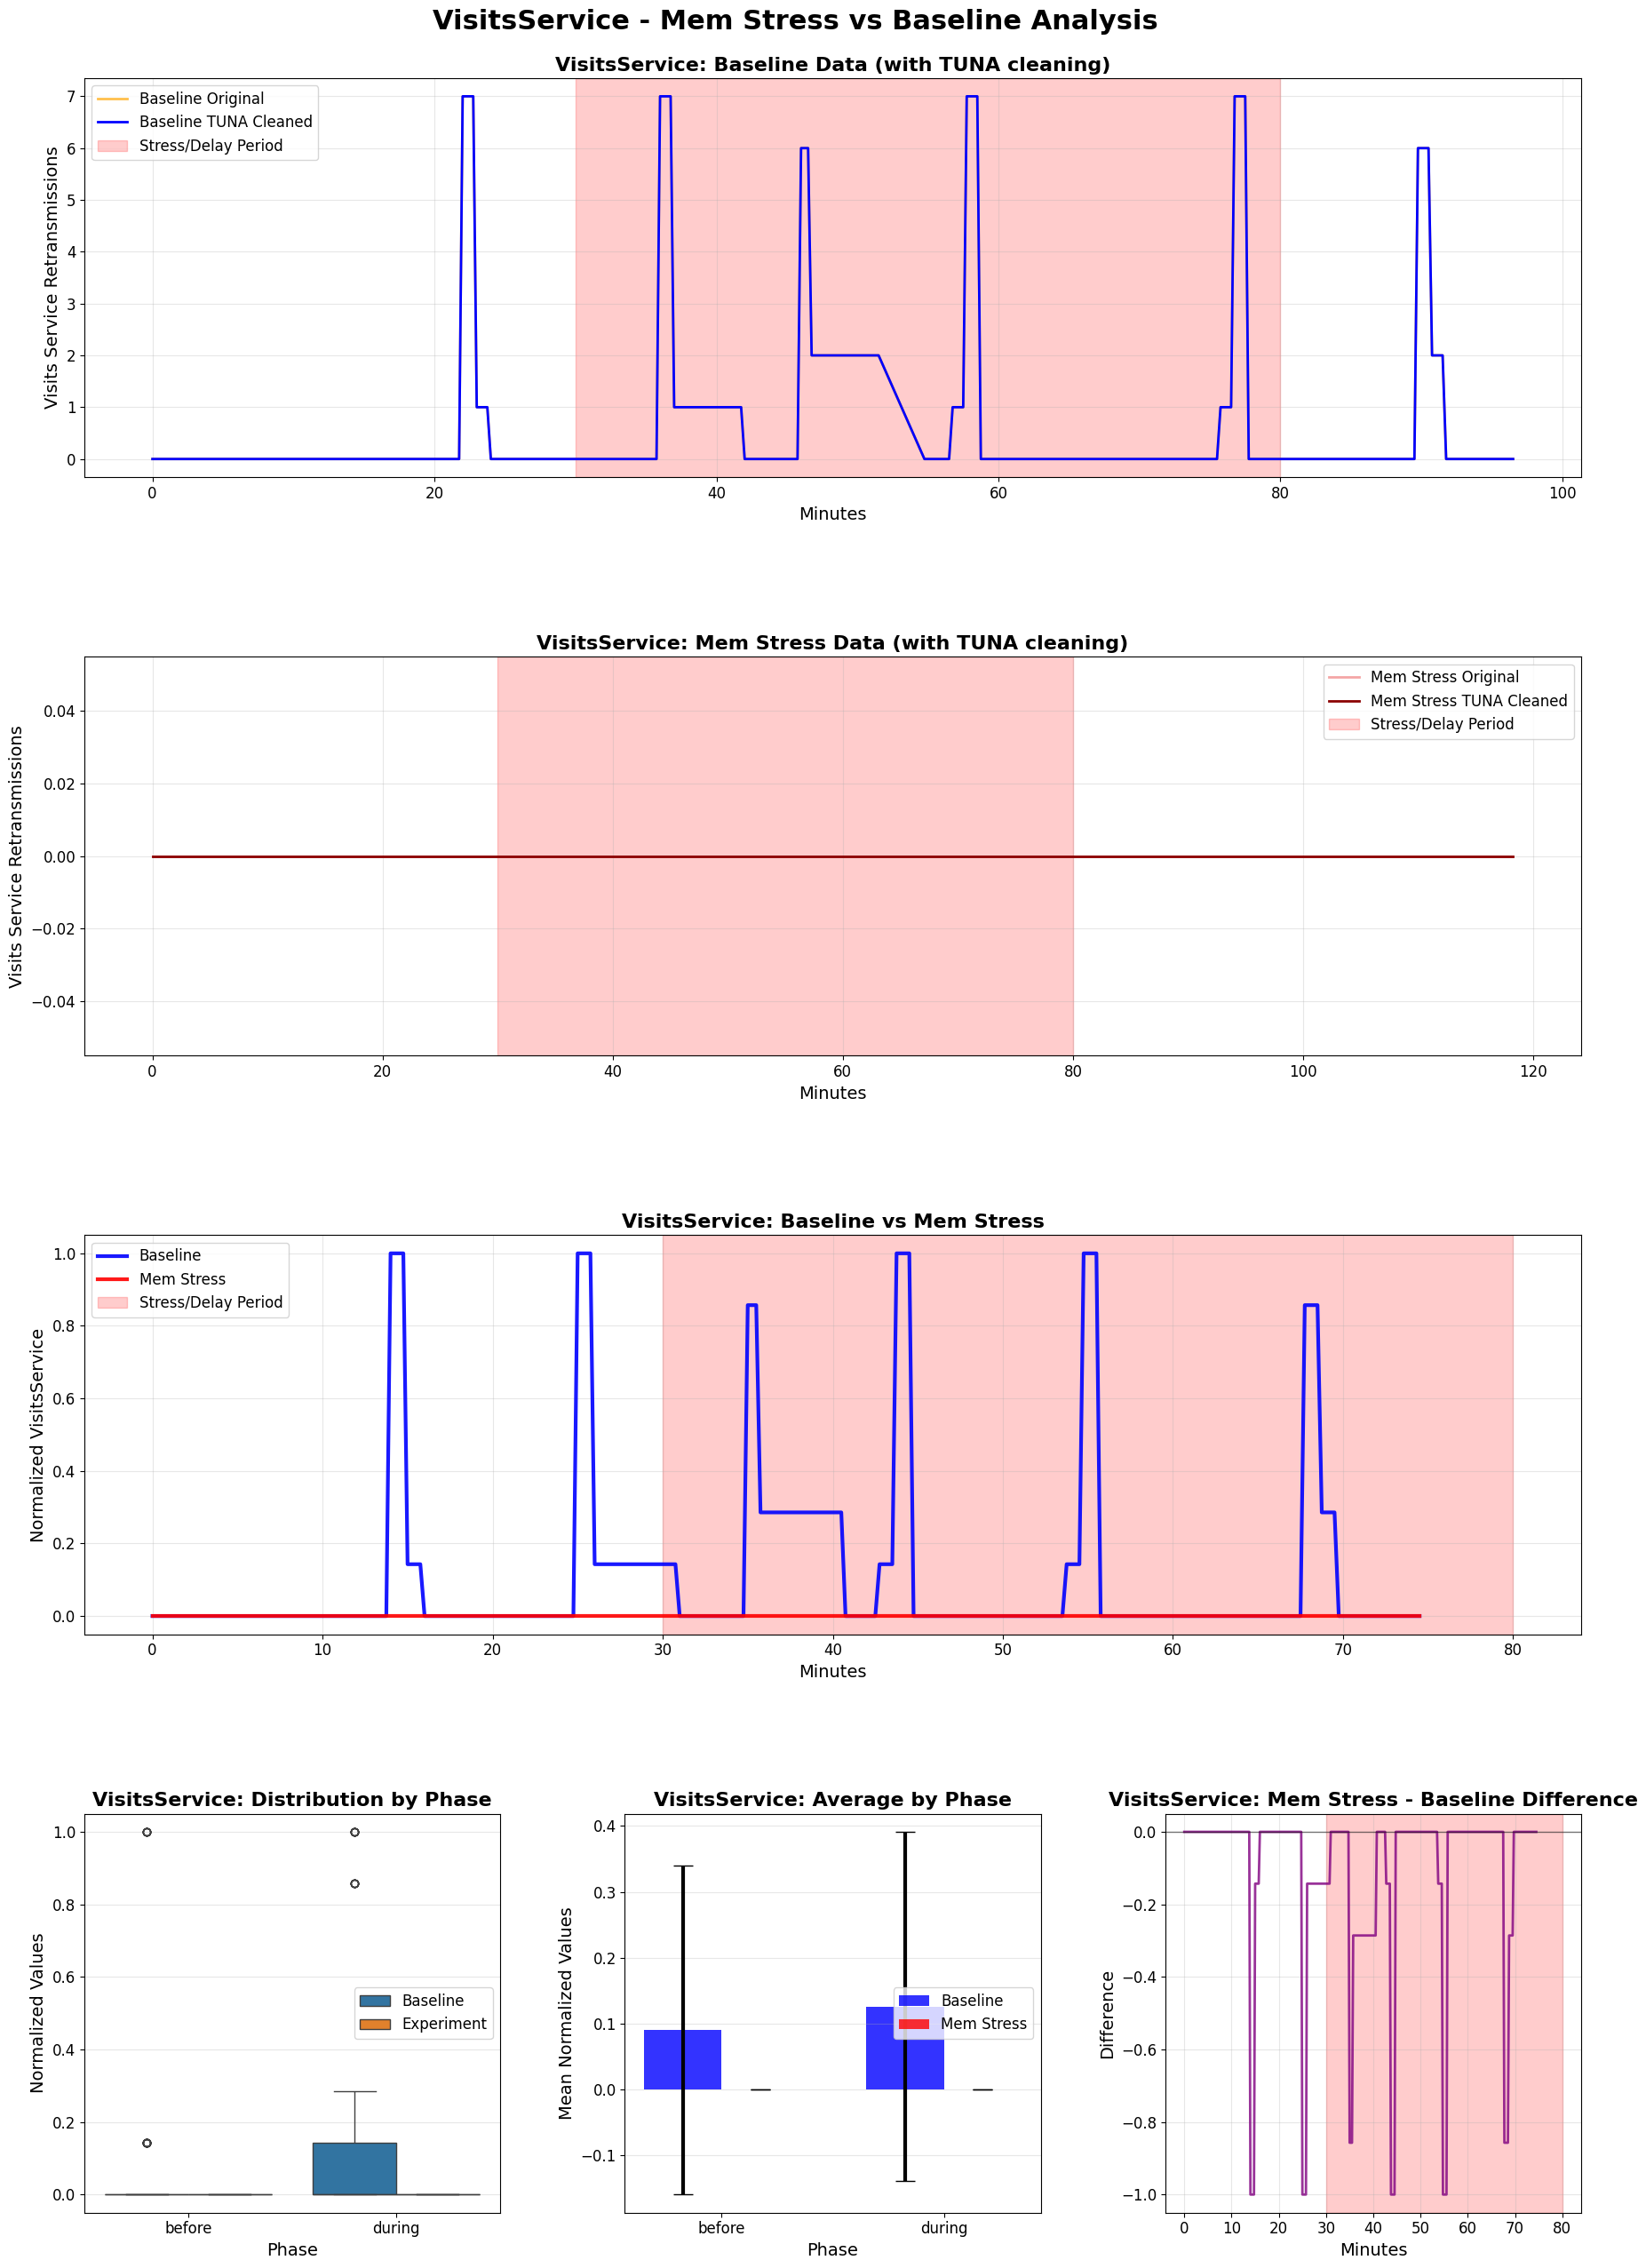

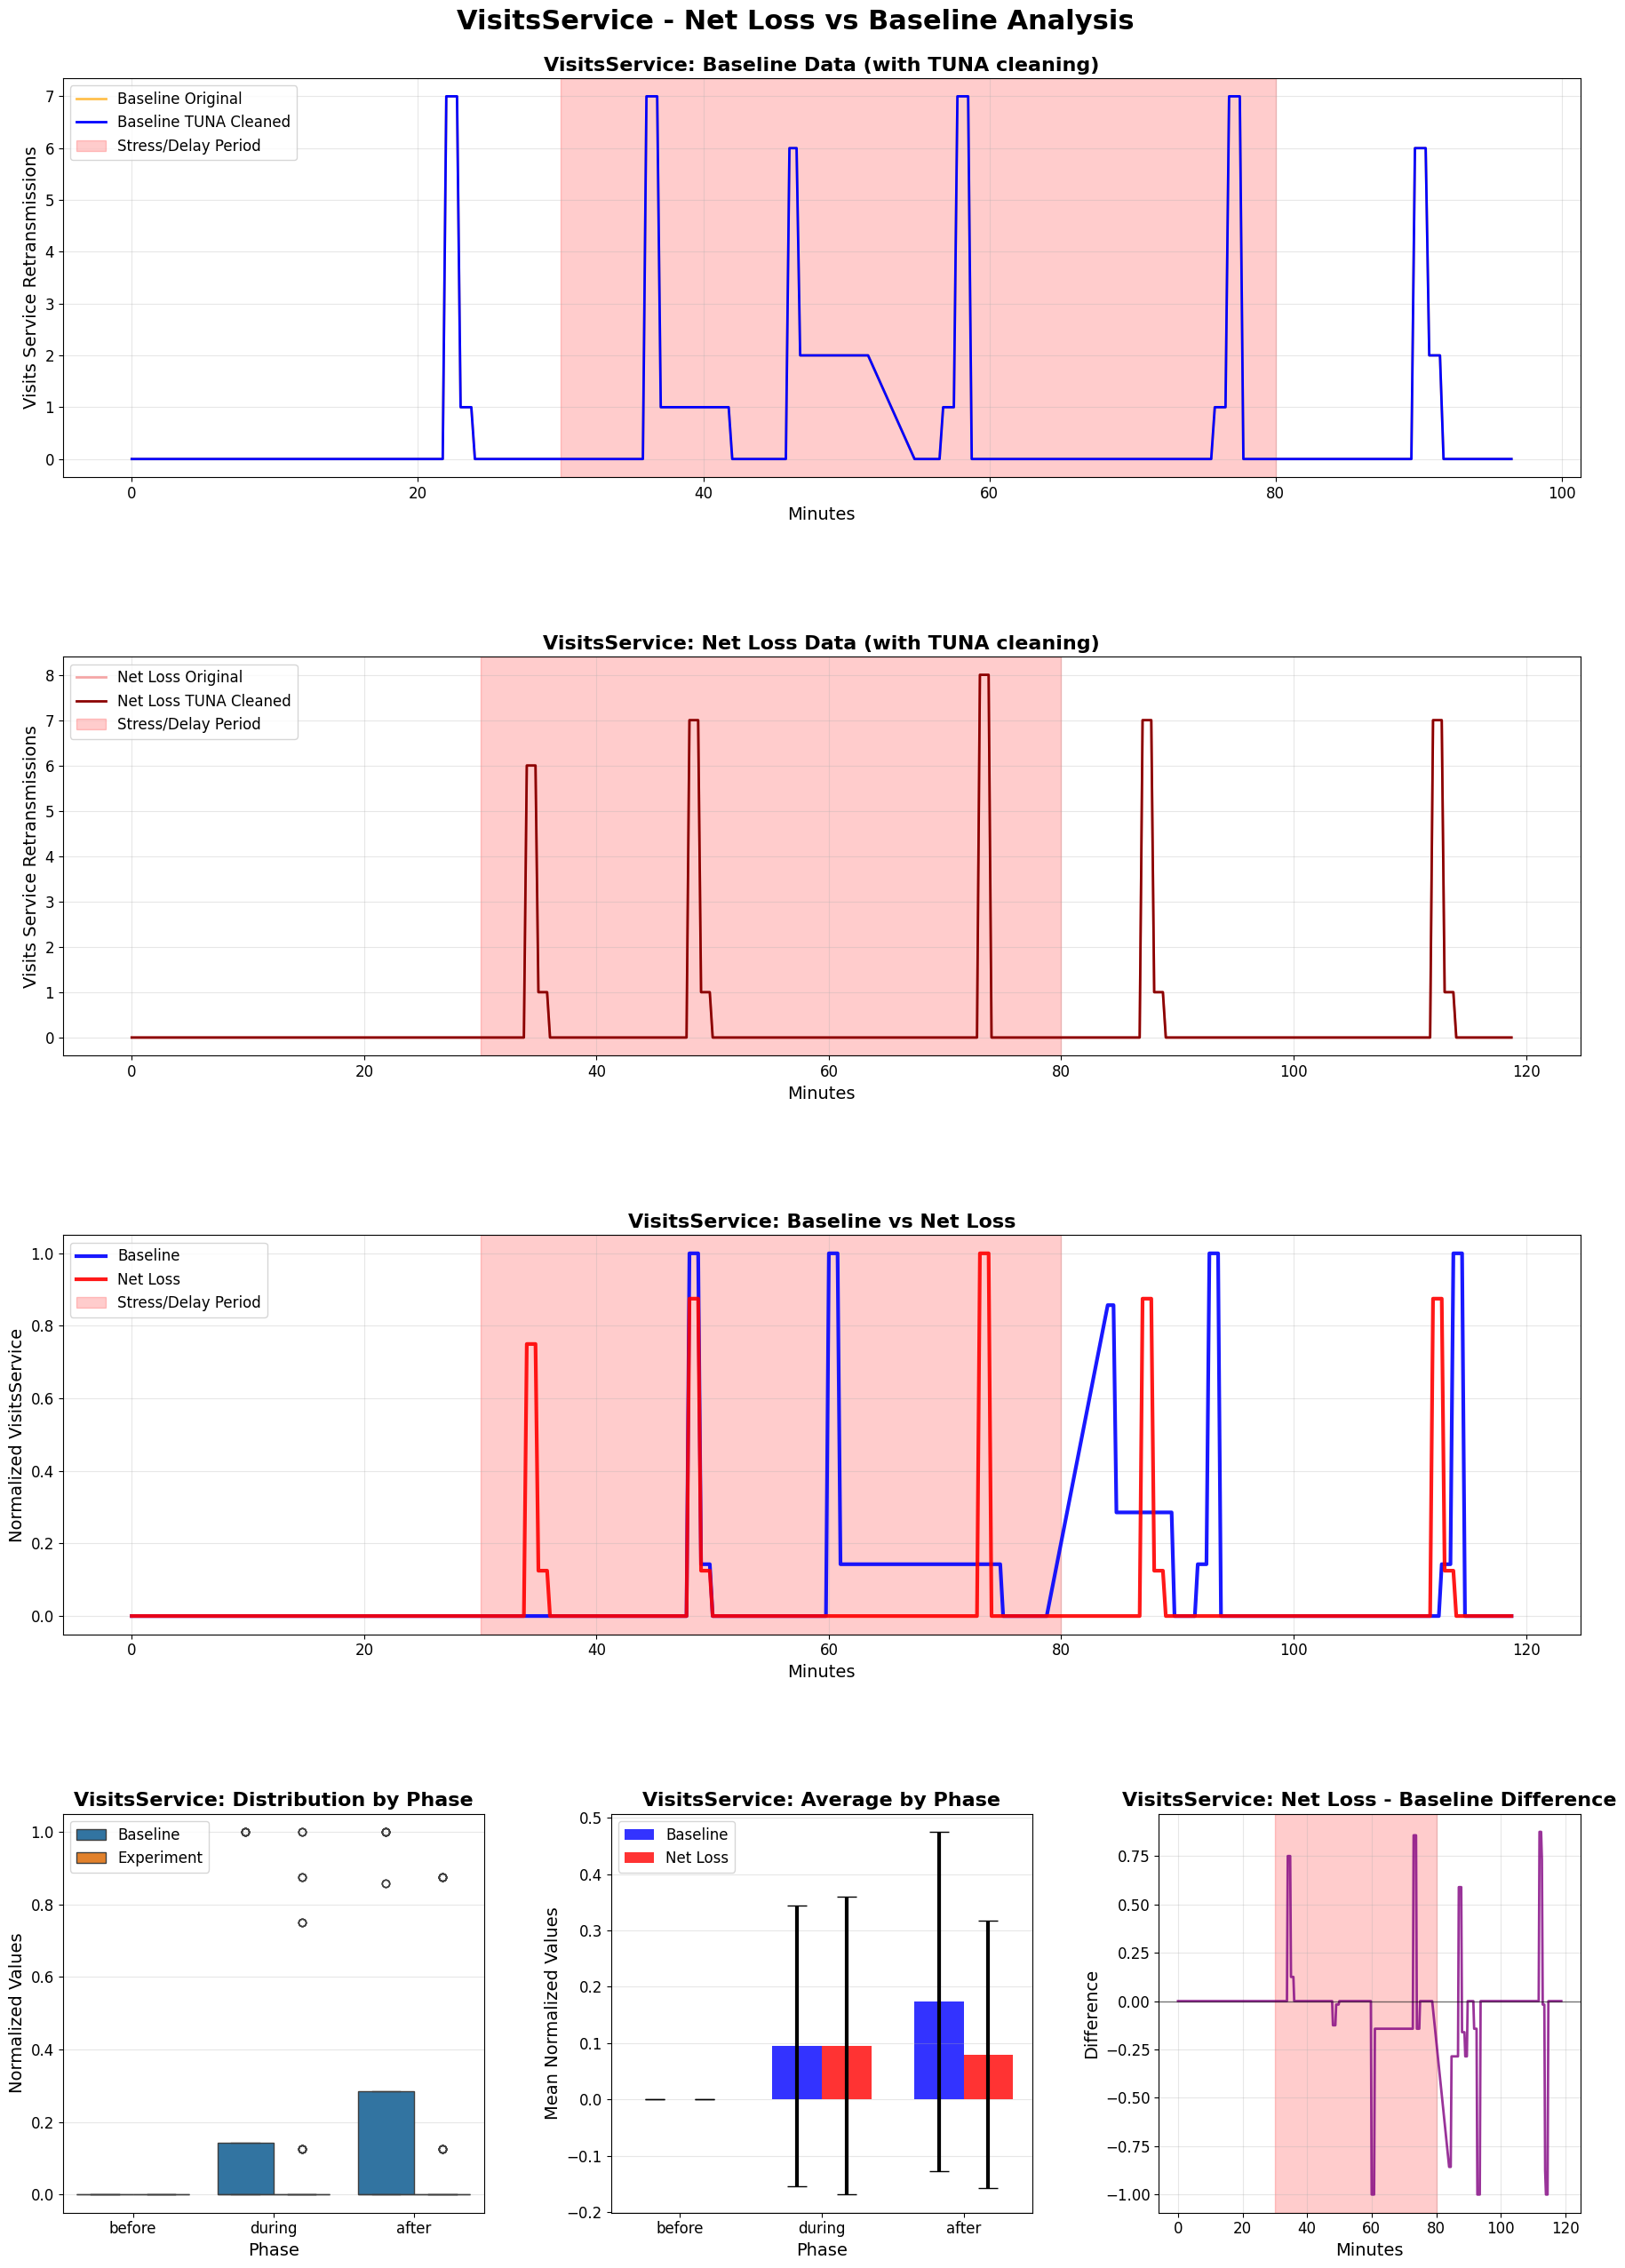

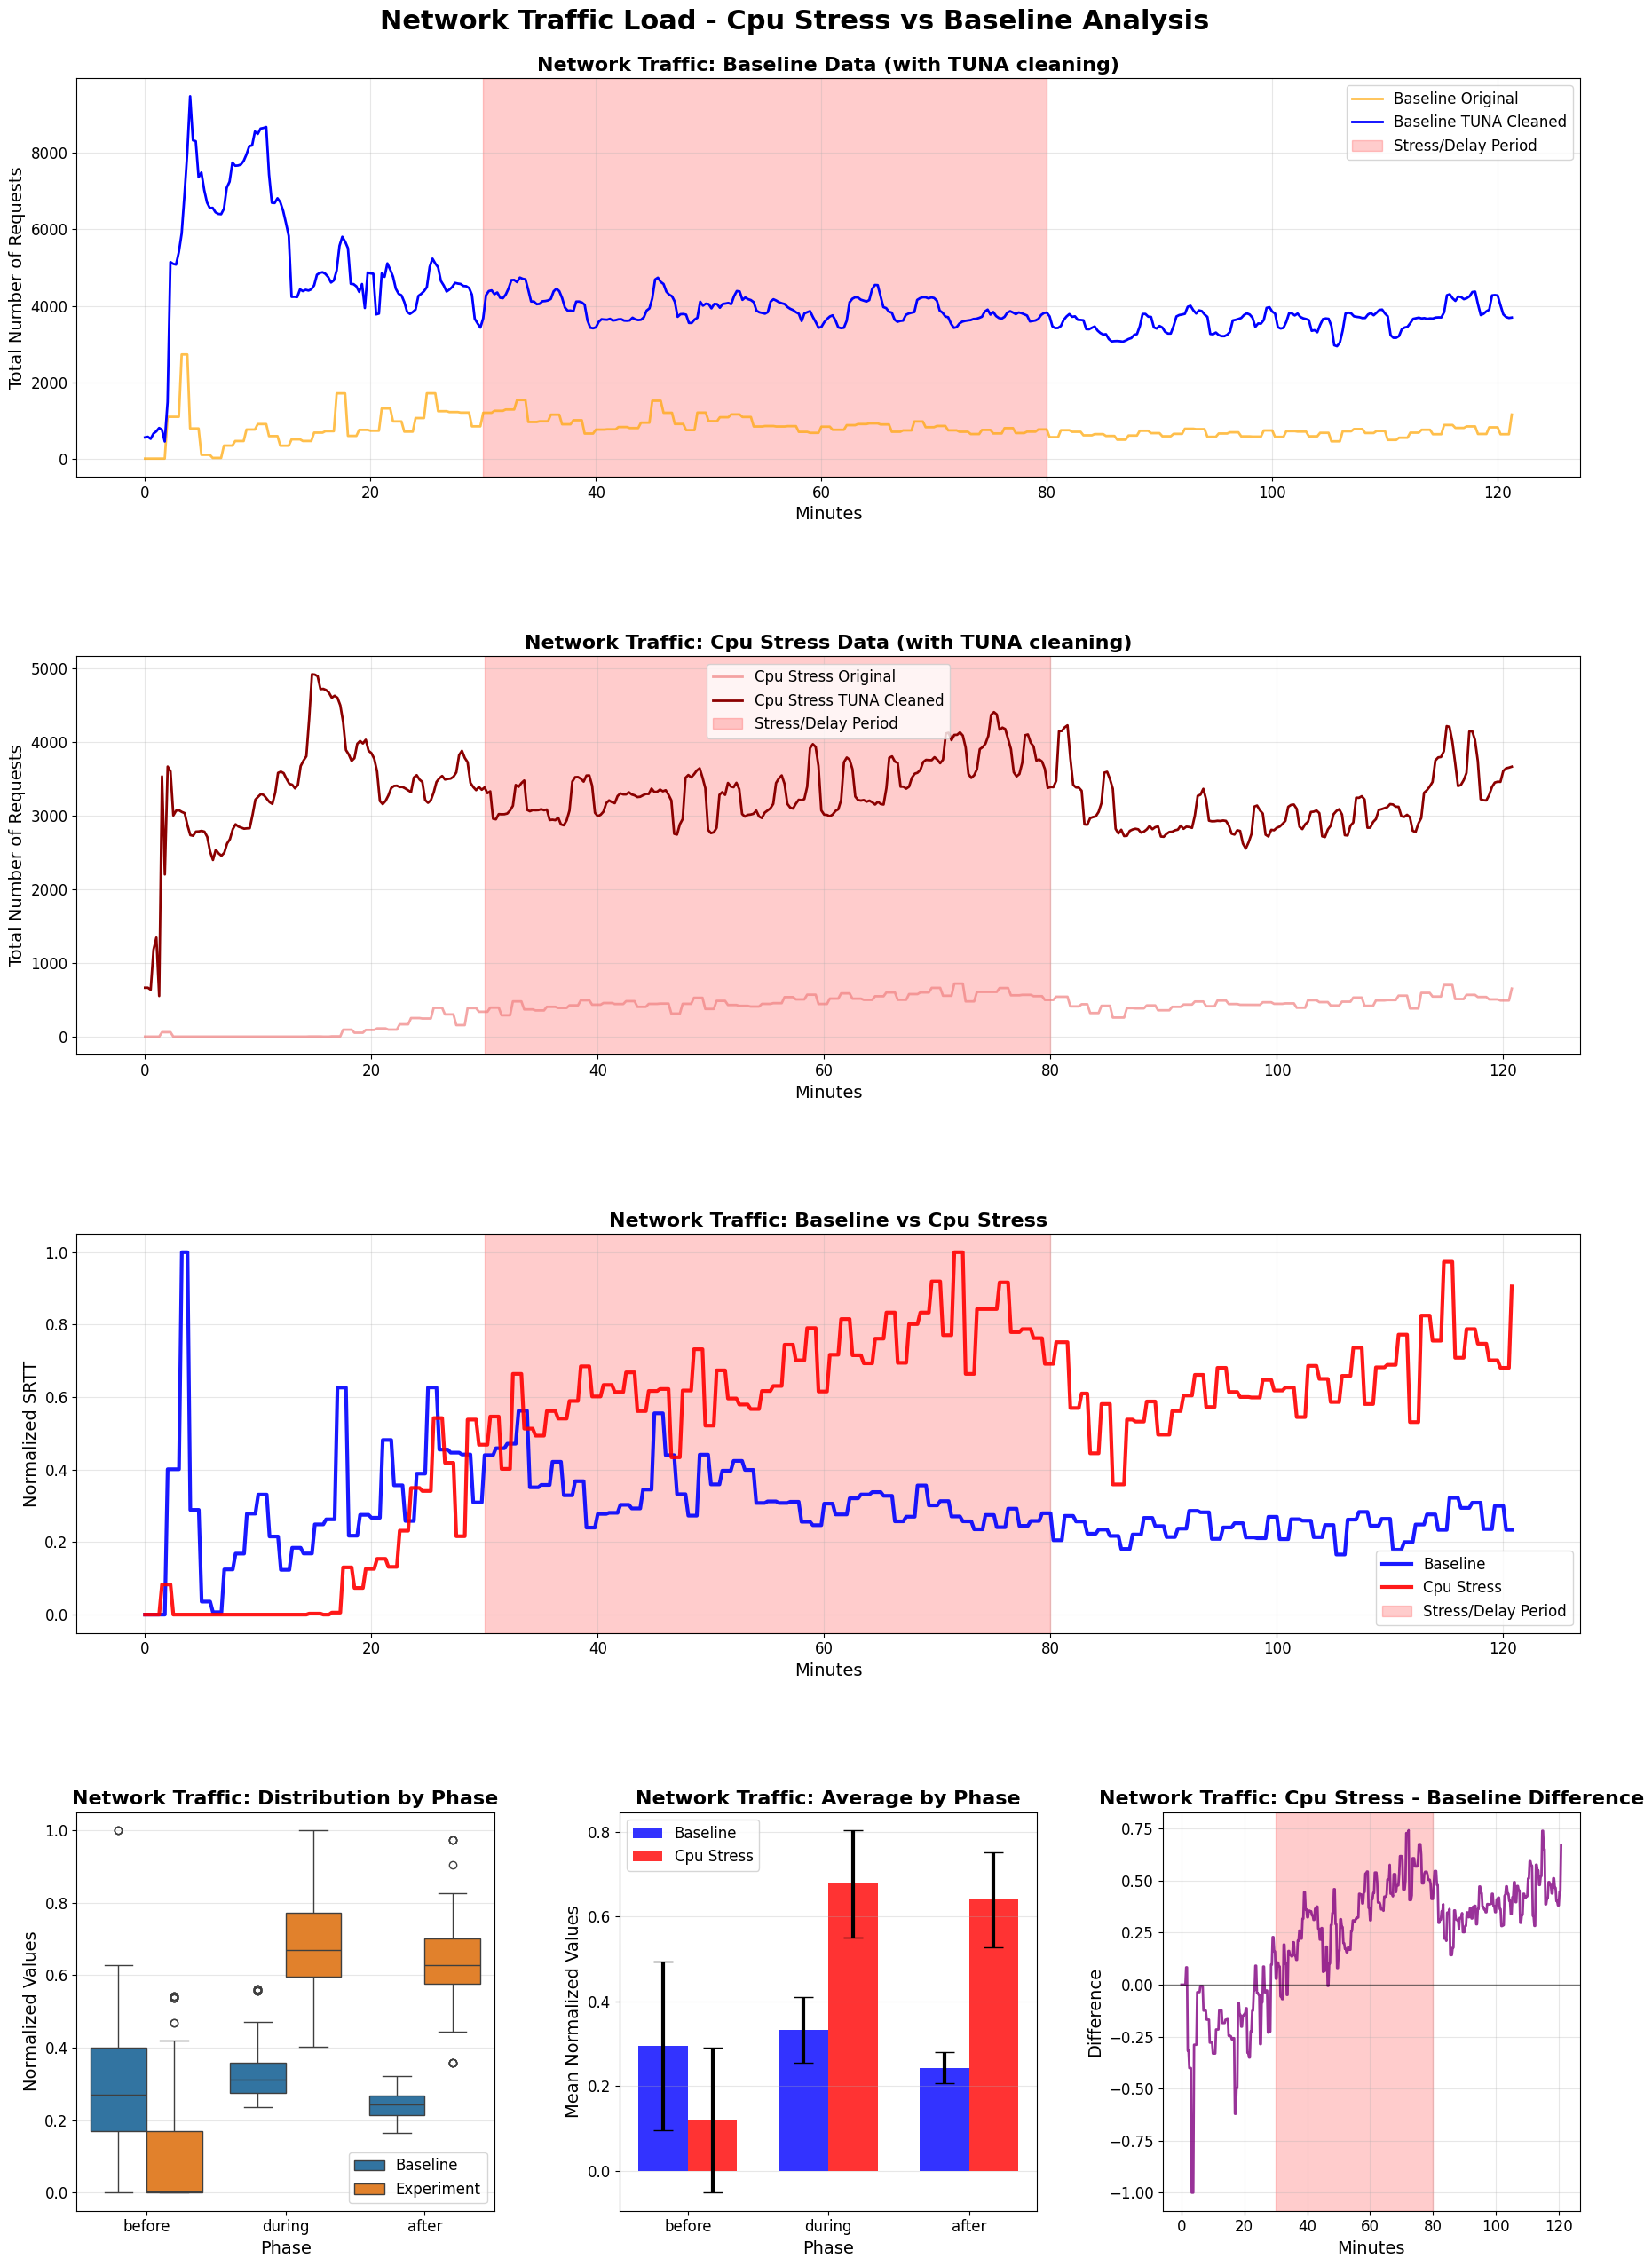

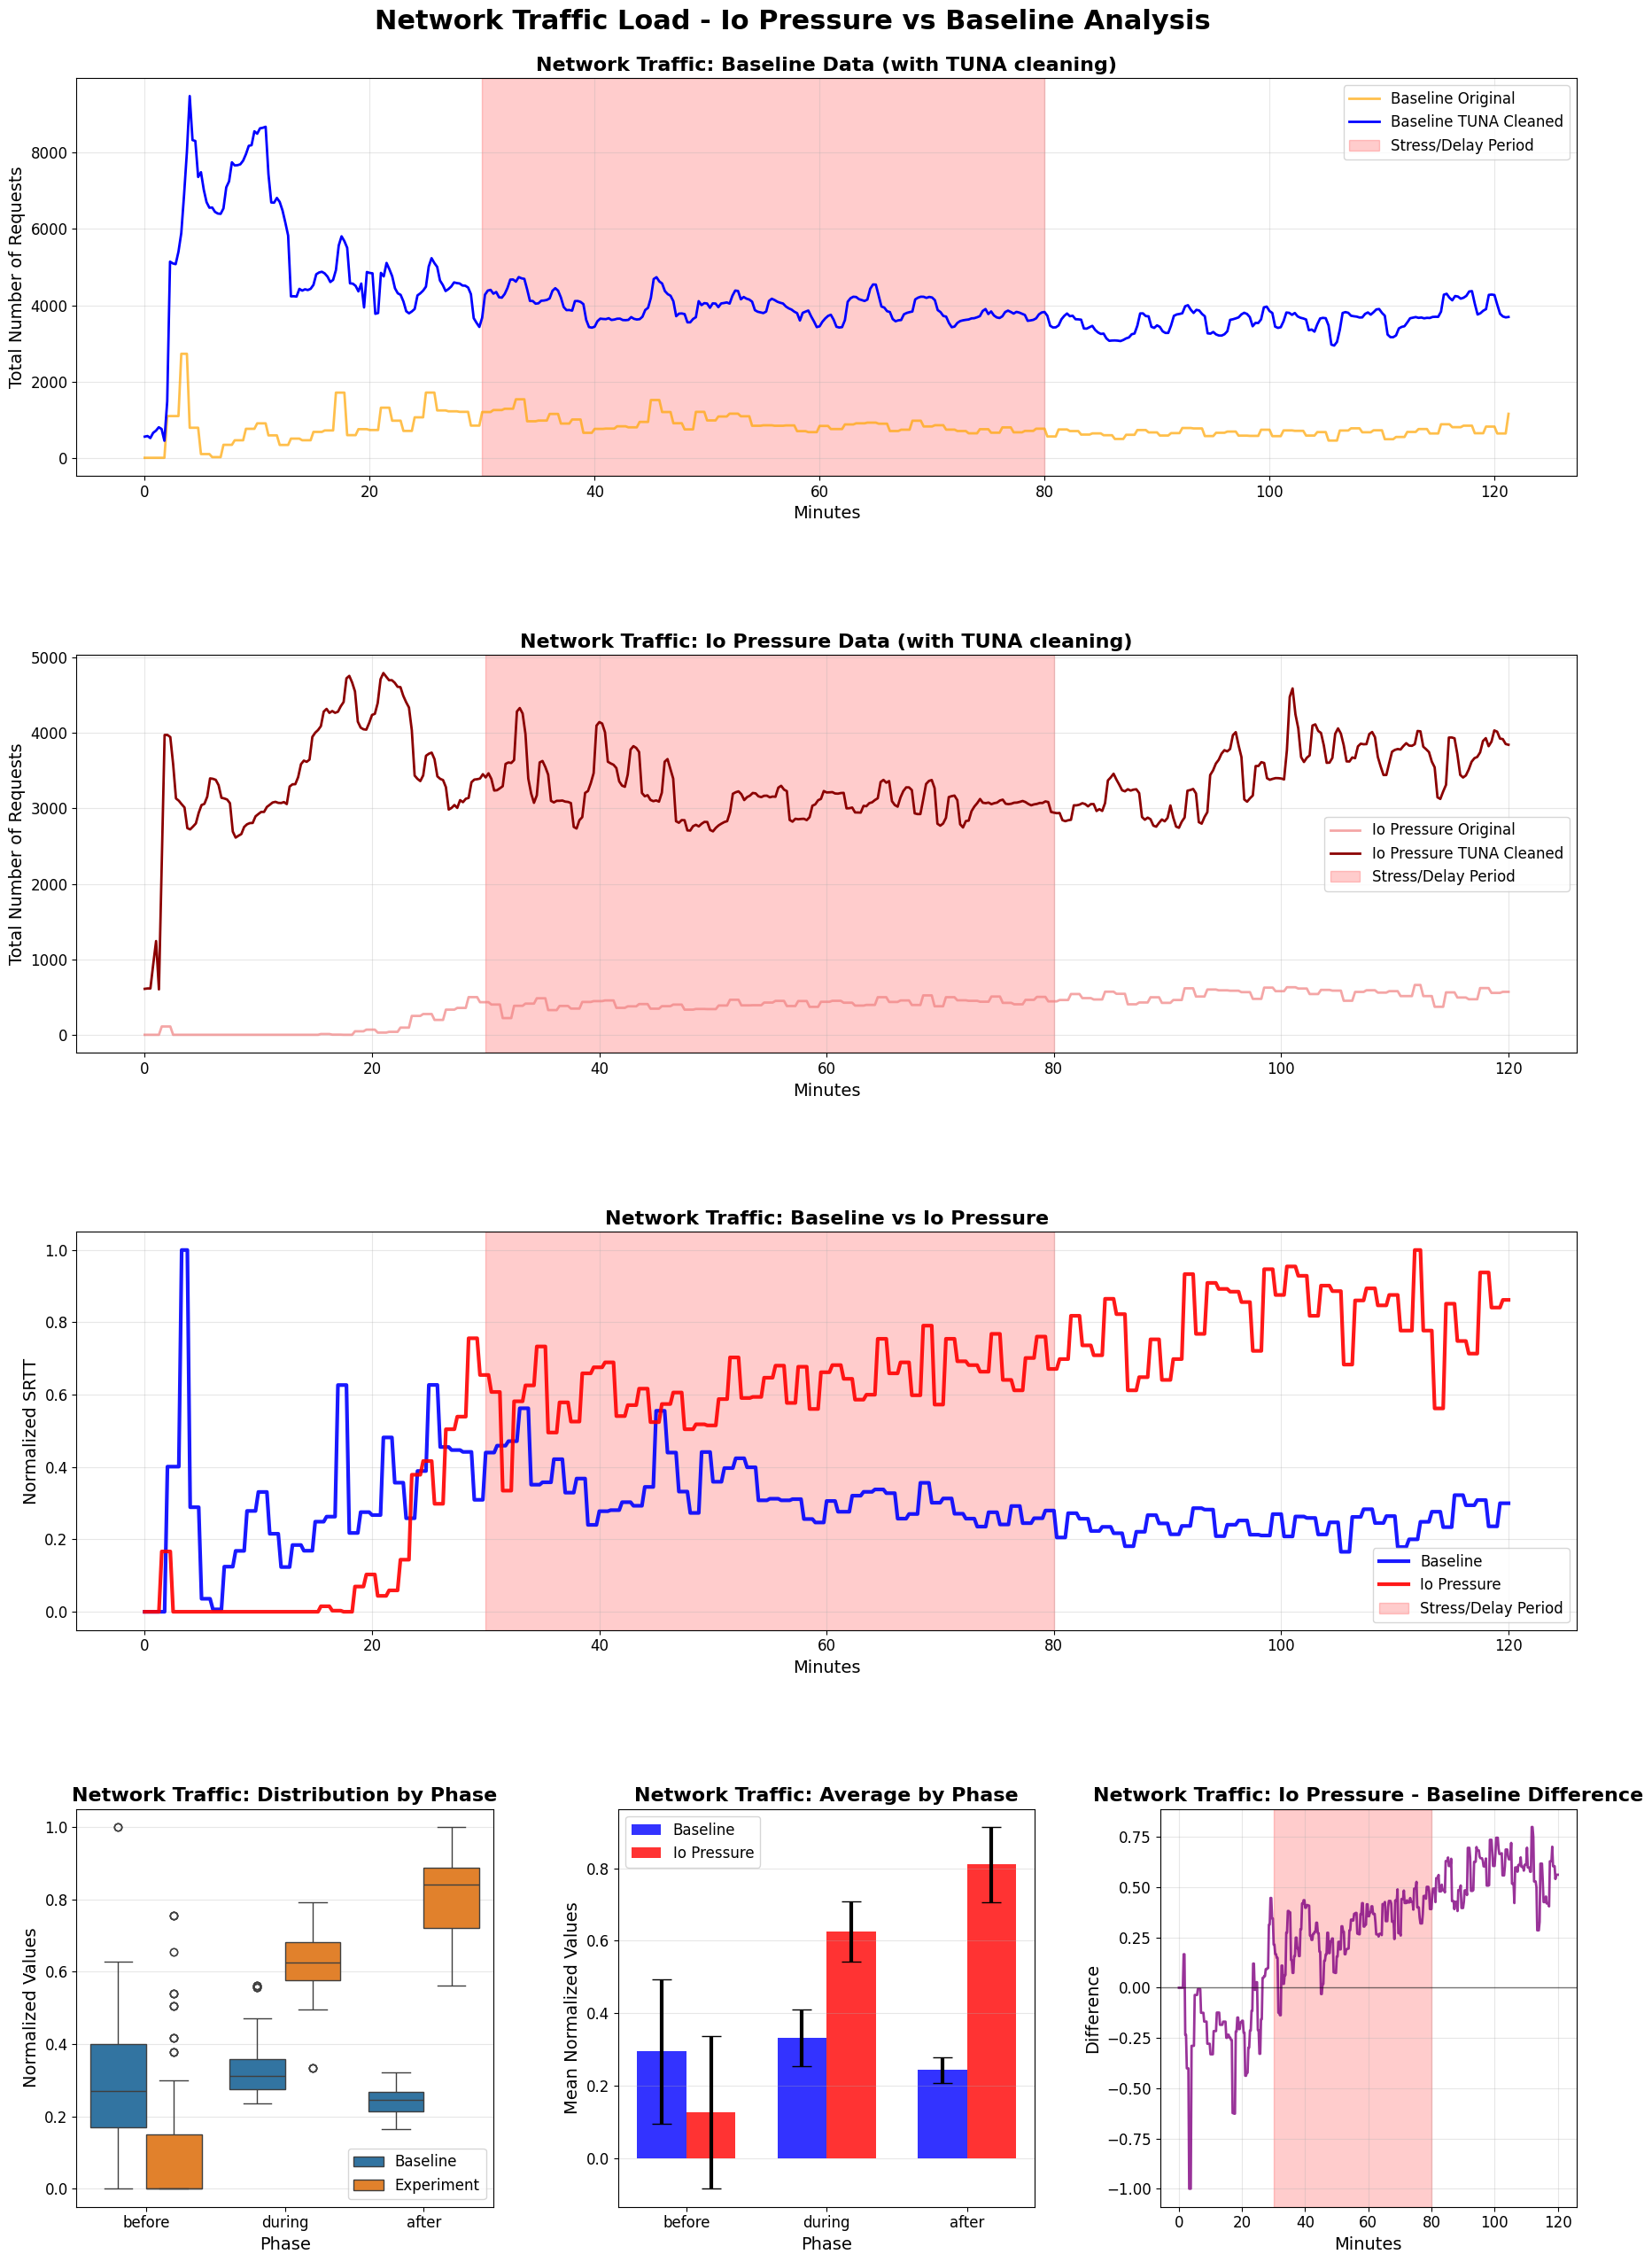

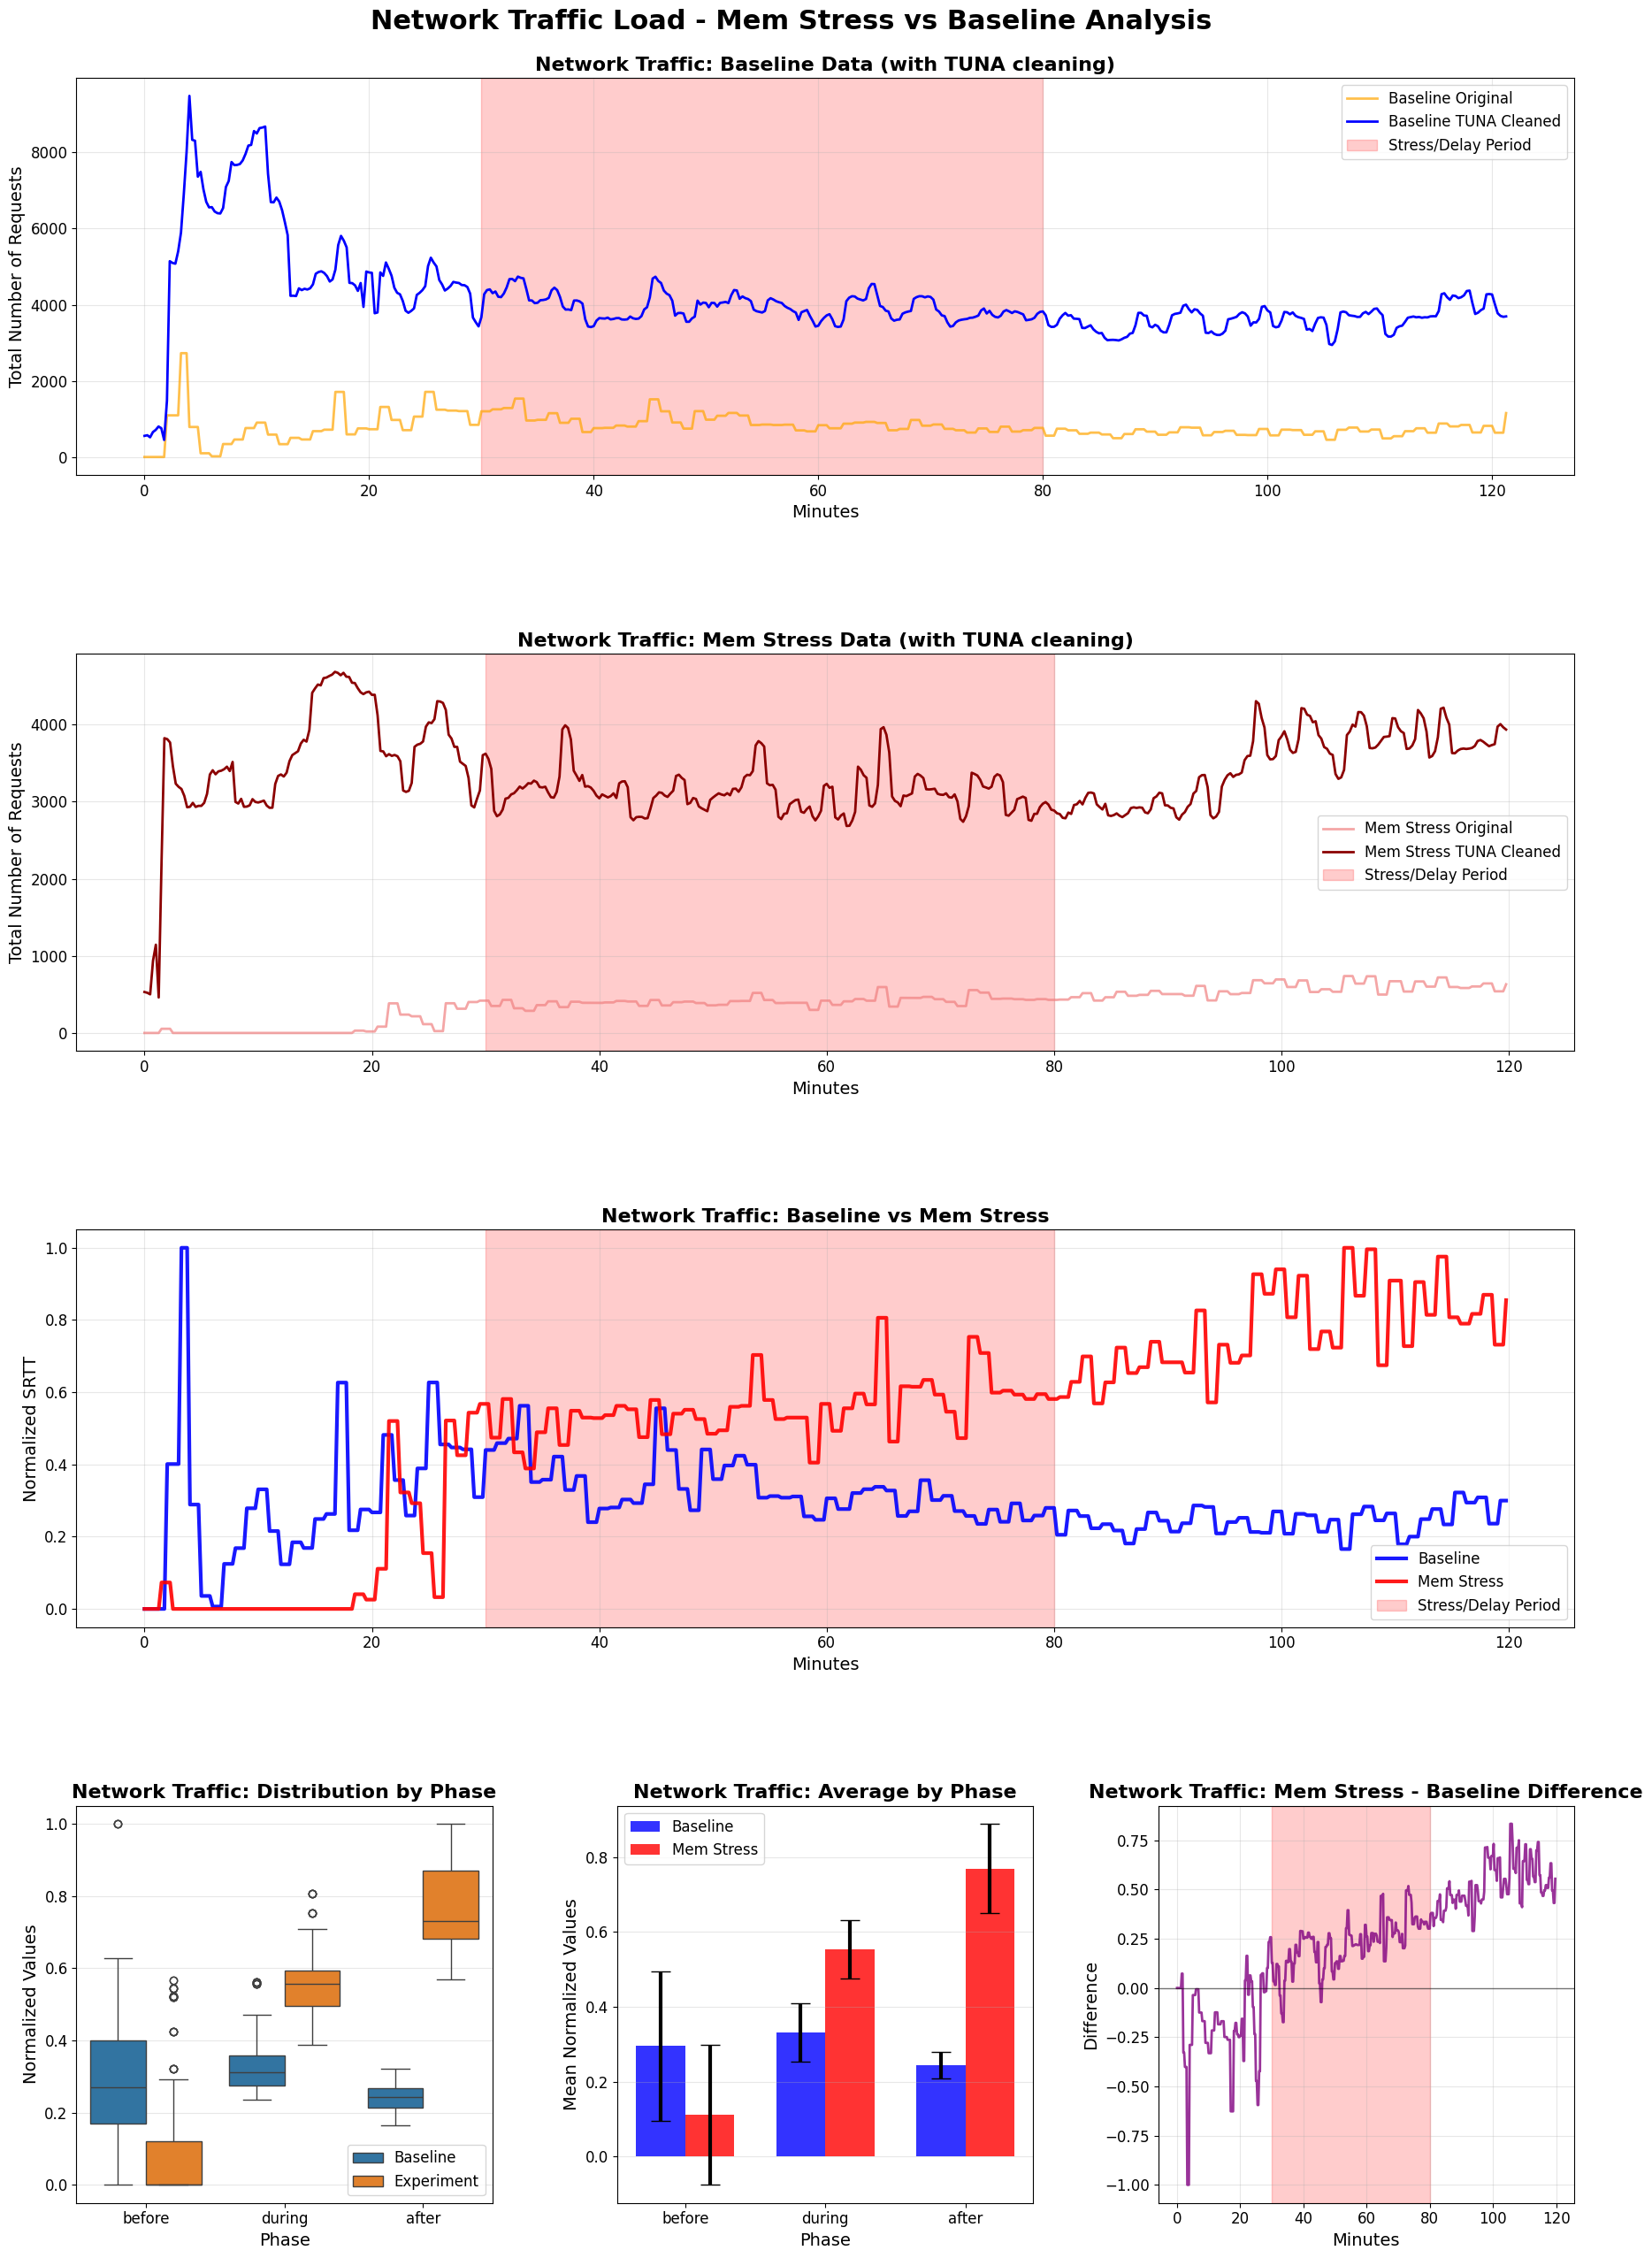

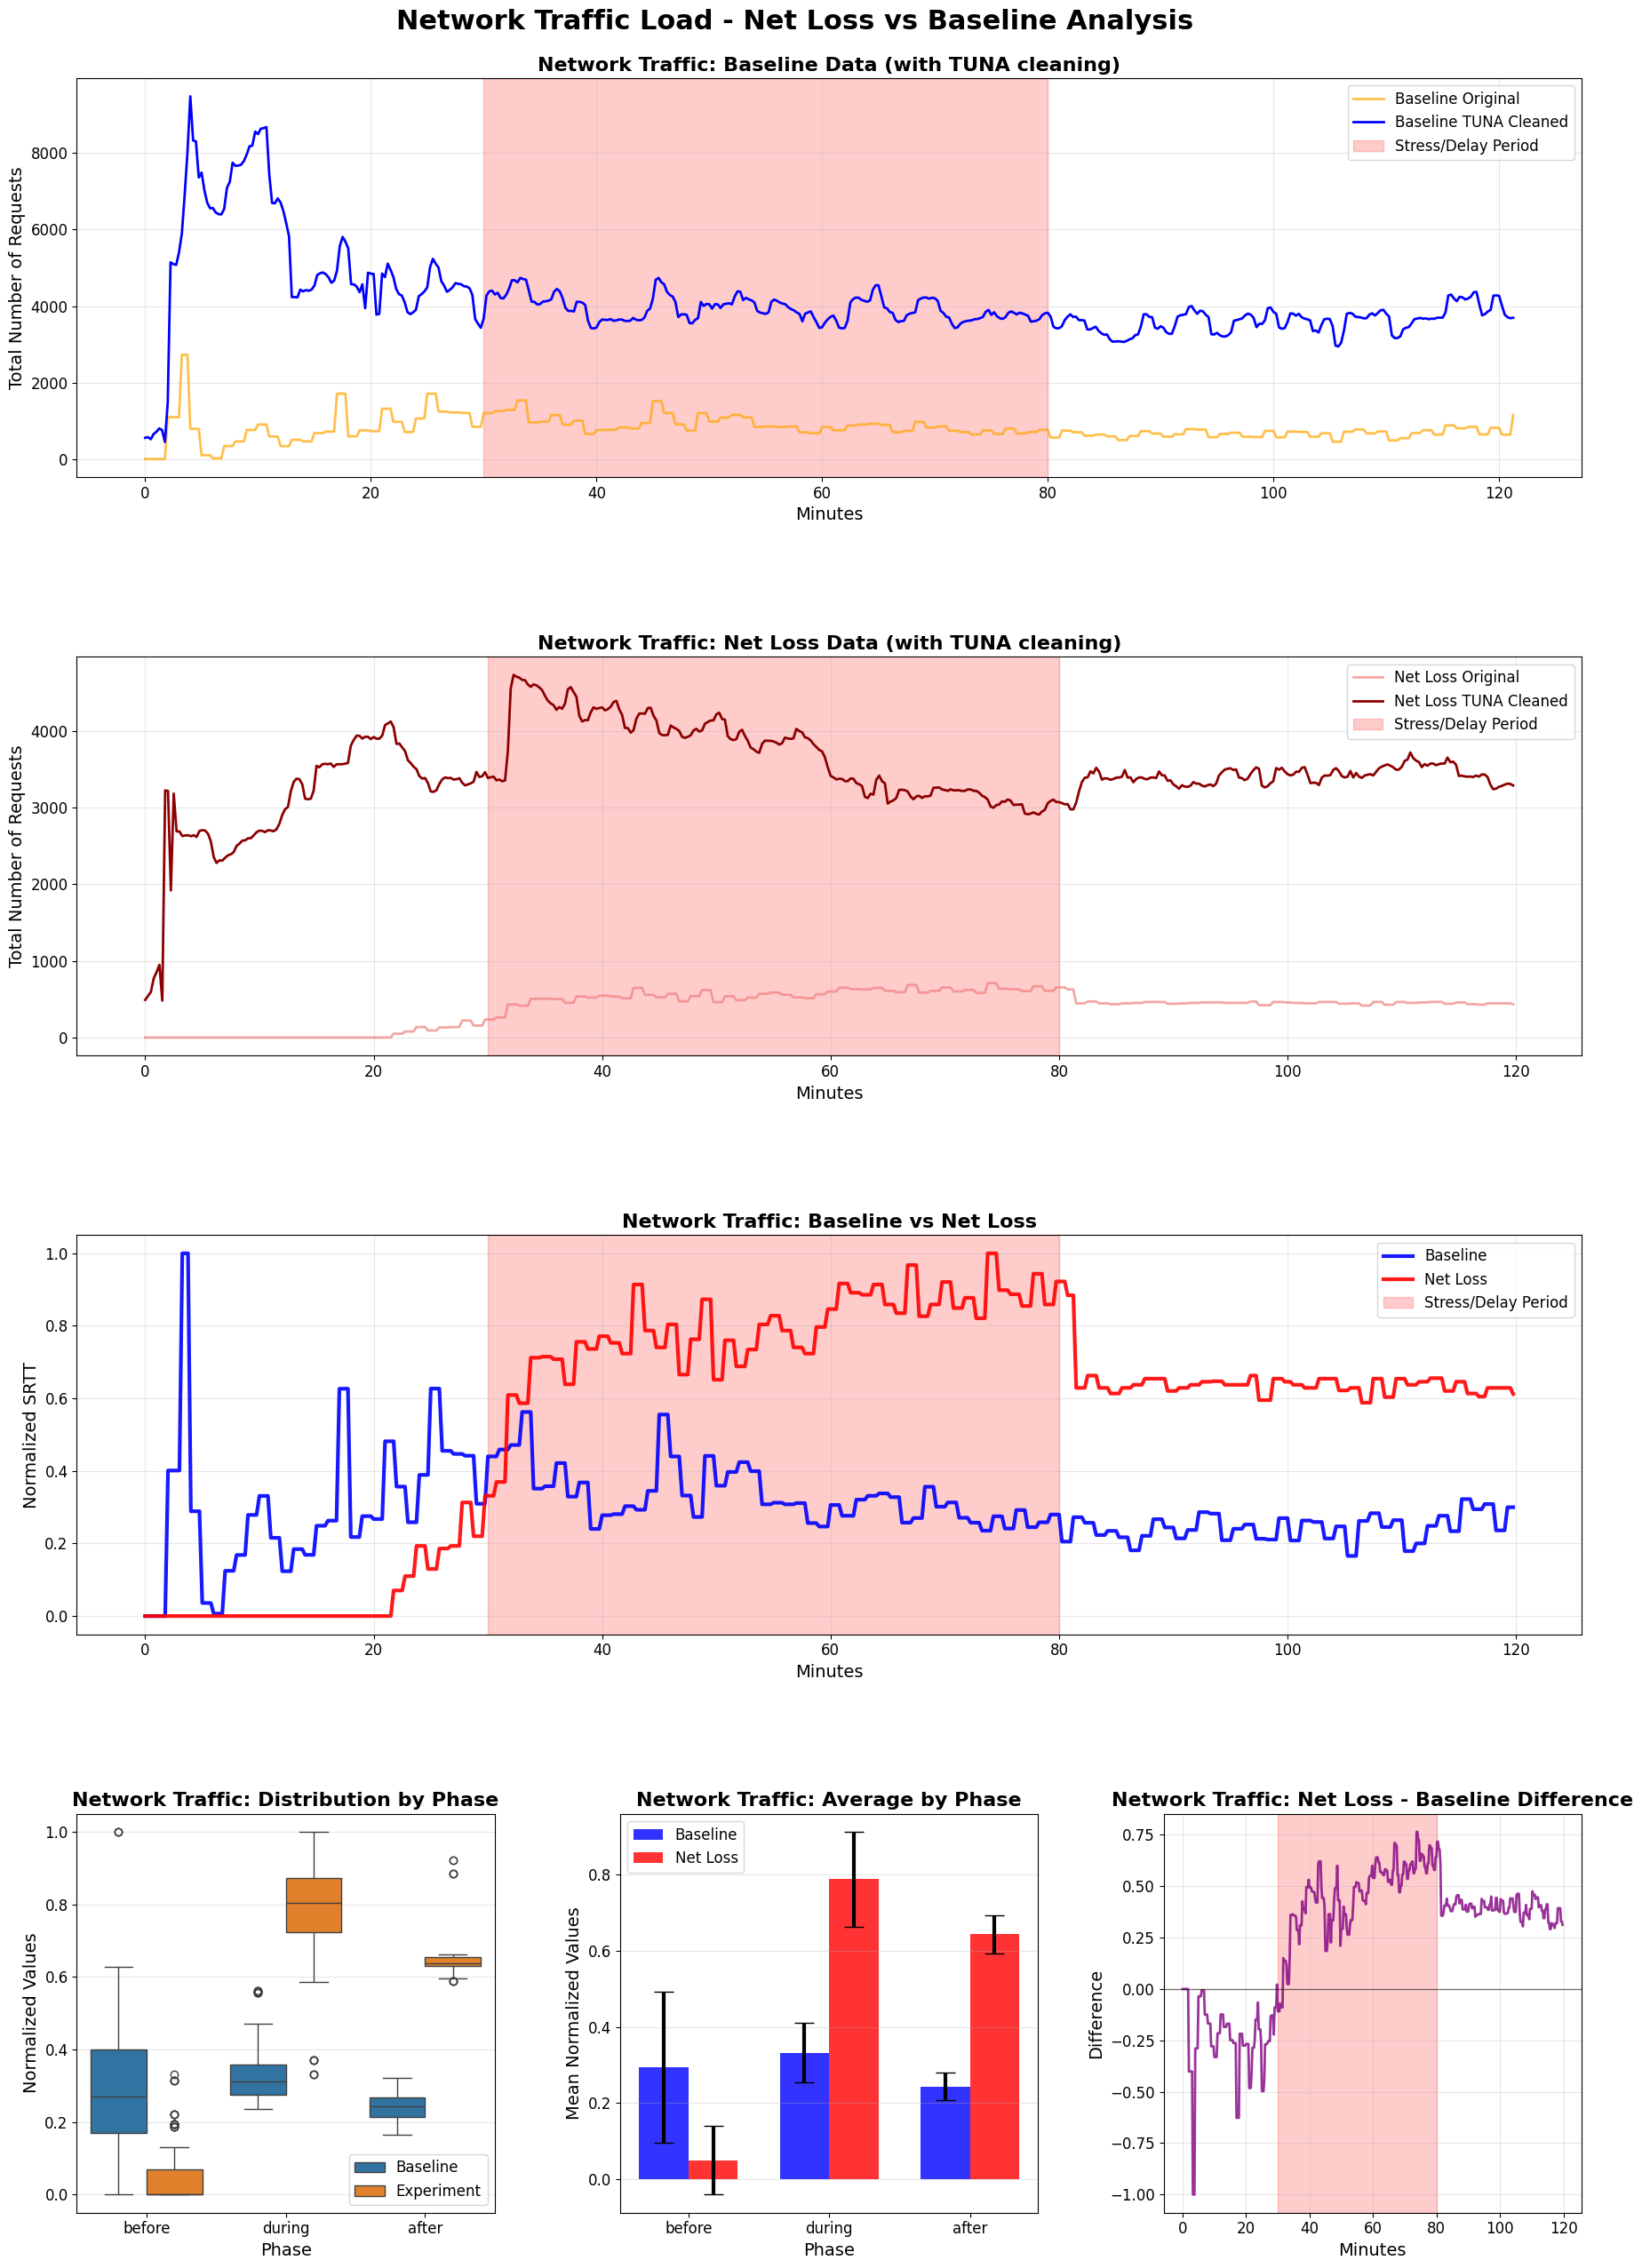

In [3]:
def calculate_tcp_values(df, metric_name):
    exclude_cols = ['Time', 'Minutes', 'source']
    value_cols = [col for col in df.columns if col not in exclude_cols]
    
    if len(value_cols) == 1:
        return df[value_cols[0]].values
    else:
        if 'srtt' in metric_name.lower():
            service_groups = {}
            for col in value_cols:
                if '_client_' in col or '_server_' in col:
                    service_name = col.split('_client_')[0] if '_client_' in col else col.split('_server_')[0]
                else:
                    service_name = col
                if service_name not in service_groups:
                    service_groups[service_name] = []
                service_groups[service_name].append(col)
            
            if service_groups:
                first_service = list(service_groups.keys())[0]
                return df[service_groups[first_service]].fillna(0).sum(axis=1).values
            else:
                return df[value_cols].fillna(0).sum(axis=1).values
        else:
            return df[value_cols].fillna(0).sum(axis=1).values

def normalize_series(series):
    min_val = series.min()
    max_val = series.max()
    if max_val > min_val:
        return (series - min_val) / (max_val - min_val)
    else:
        return pd.Series(np.zeros(len(series)), index=series.index)

def get_y_axis_label(metric_name):
    labels = {
        'ApiGateway': 'API Gateway Retransmissions',
        'CustomersService': 'Customers Service Retransmissions',
        'VetsService': 'Vets Service Retransmissions', 
        'VisitsService': 'Visits Service Retransmissions',
        'Network traffic': 'Total Number of Requests',
        'SRTT': 'Total Number of Requests',
        'srtt': 'Total Number of Requests'
    }
    
    if 'srtt' in metric_name.lower():
        return 'Total Number of Requests'
    
    return labels.get(metric_name, 'TCP Metric Value')

def analyze_and_plot_tcp_comparison(metric_name, experiment_name, experiment_df, baseline_df, 
                                   tuna_results=None, delay_minutes=30, duration_minutes=50):
    
    experiment_values = calculate_tcp_values(experiment_df, metric_name)
    baseline_values = calculate_tcp_values(baseline_df, metric_name)
    
    experiment_series = pd.Series(experiment_values, index=experiment_df.index)
    baseline_series = pd.Series(baseline_values, index=baseline_df.index)
    
    experiment_cleaned = None
    baseline_cleaned = None
    if tuna_results and metric_name in tuna_results:
        if experiment_name in tuna_results[metric_name]:
            experiment_cleaned = pd.Series(tuna_results[metric_name][experiment_name]['cleaned'])
        if 'baseline' in tuna_results[metric_name]:
            baseline_cleaned = pd.Series(tuna_results[metric_name]['baseline']['cleaned'])
    
    experiment_norm = normalize_series(experiment_series)
    baseline_norm = normalize_series(baseline_series)
    
    min_length = min(len(experiment_norm), len(baseline_norm), len(experiment_df['Minutes']), len(baseline_df['Minutes']))
    
    df_combined = pd.DataFrame({
        'Baseline': baseline_norm.iloc[:min_length],
        'Experiment': experiment_norm.iloc[:min_length],
        'Minutes': experiment_df['Minutes'].iloc[:min_length],
        'Baseline_Minutes': baseline_df['Minutes'].iloc[:min_length]
    })
    
    df_combined['difference'] = df_combined['Experiment'] - df_combined['Baseline']
    
    df_combined['phase'] = 'before'
    df_combined.loc[(df_combined['Minutes'] >= delay_minutes) & 
                   (df_combined['Minutes'] <= delay_minutes + duration_minutes), 'phase'] = 'during'
    df_combined.loc[df_combined['Minutes'] > delay_minutes + duration_minutes, 'phase'] = 'after'
    
    stats_baseline = df_combined.groupby('phase')['Baseline'].agg(['mean', 'std', 'min', 'max'])
    stats_experiment = df_combined.groupby('phase')['Experiment'].agg(['mean', 'std', 'min', 'max'])
    
    t_tests = {}
    available_phases = stats_baseline.index.tolist()
    
    for phase in ['before', 'during', 'after']:
        if phase in available_phases:
            data = df_combined[df_combined['phase'] == phase]
            if len(data) > 1:
                t_stat, p_value = scipy_stats.ttest_ind(data['Baseline'].dropna(), data['Experiment'].dropna())
                t_tests[phase] = {'t': t_stat, 'p': p_value}
            else:
                t_tests[phase] = {'t': 0, 'p': 1}
        else:
            t_tests[phase] = {'t': 0, 'p': 1, 'note': 'Phase not present in data'}
    
    impact = {}
    for phase in ['before', 'during', 'after']:
        if phase in available_phases:
            baseline_mean = stats_baseline.loc[phase, 'mean']
            experiment_mean = stats_experiment.loc[phase, 'mean']
            if baseline_mean != 0:
                impact[phase] = ((experiment_mean - baseline_mean) / baseline_mean) * 100
            else:
                impact[phase] = 0
        else:
            impact[phase] = 0
    
    fig = plt.figure(figsize=(18, 26))
    
    y_label = get_y_axis_label(metric_name)
    
    plt.subplot(4, 1, 1)
    plt.plot(baseline_df['Minutes'], baseline_series, 
             label='Baseline Original', color='orange', alpha=0.7, linewidth=2)
    
    if baseline_cleaned is not None:
        plt.plot(baseline_df['Minutes'].iloc[:len(baseline_cleaned)], baseline_cleaned, 
                 label='Baseline TUNA Cleaned', linewidth=2, color='blue')
        title_suffix = " (with TUNA cleaning)"
    else:
        plt.plot(baseline_df['Minutes'], baseline_series, 
                 label='Baseline', linewidth=2, color='blue')
        title_suffix = ""
    
    plt.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2, label="Stress/Delay Period")
    
    plot_title = f'{metric_name}: Baseline Data{title_suffix}'
    if 'srtt' in metric_name.lower():
        plot_title = f'Network Traffic: Baseline Data{title_suffix}'
    
    plt.title(plot_title, fontsize=16, fontweight='bold')
    plt.xlabel('Minutes', fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tick_params(axis='both', which='major', labelsize=12)
    
    plt.subplot(4, 1, 2)
    plt.plot(experiment_df['Minutes'], experiment_series, 
             label=f'{experiment_name.replace("_", " ").title()} Original', 
             alpha=0.7, color='lightcoral', linewidth=2)
    
    if experiment_cleaned is not None:
        plt.plot(experiment_df['Minutes'].iloc[:len(experiment_cleaned)], experiment_cleaned, 
                 label=f'{experiment_name.replace("_", " ").title()} TUNA Cleaned', 
                 linewidth=2, color='darkred')
        title_suffix = " (with TUNA cleaning)"
    else:
        plt.plot(experiment_df['Minutes'], experiment_series, 
                 label=f'{experiment_name.replace("_", " ").title()}', 
                 linewidth=2, color='darkred')
        title_suffix = ""
    
    plt.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2, label="Stress/Delay Period")
    
    plot_title = f'{metric_name}: {experiment_name.replace("_", " ").title()} Data{title_suffix}'
    if 'srtt' in metric_name.lower():
        plot_title = f'Network Traffic: {experiment_name.replace("_", " ").title()} Data{title_suffix}'
    
    plt.title(plot_title, fontsize=16, fontweight='bold')
    plt.xlabel('Minutes', fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tick_params(axis='both', which='major', labelsize=12)
    
    plt.subplot(4, 1, 3)
    plt.plot(df_combined['Minutes'], df_combined['Baseline'], 
             label='Baseline', linewidth=3, color='blue', alpha=0.9)
    plt.plot(df_combined['Minutes'], df_combined['Experiment'], 
             label=f'{experiment_name.replace("_", " ").title()}', linewidth=3, color='red', alpha=0.9)
    plt.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2, label="Stress/Delay Period")
    
    comparison_title = f"{metric_name}: Baseline vs {experiment_name.replace('_', ' ').title()}"
    if 'srtt' in metric_name.lower():
        comparison_title = f"Network Traffic: Baseline vs {experiment_name.replace('_', ' ').title()}"
    
    plt.title(comparison_title, fontsize=16, fontweight='bold')
    plt.xlabel("Minutes", fontsize=14)
    plt.ylabel(f"Normalized {metric_name}", fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=12)
    
    plt.subplot(4, 3, 10)
    box_data = pd.melt(df_combined[['Baseline', 'Experiment', 'phase']], 
                      id_vars=['phase'], var_name='source', value_name='value')
    sns.boxplot(x='phase', y='value', hue='source', data=box_data, ax=plt.gca())
    
    box_title = f'{metric_name}: Distribution by Phase'
    if 'srtt' in metric_name.lower():
        box_title = f'Network Traffic: Distribution by Phase'
    
    plt.title(box_title, fontsize=16, fontweight='bold')
    plt.xlabel('Phase', fontsize=14)
    plt.ylabel('Normalized Values', fontsize=14)
    plt.grid(axis='y', alpha=0.3)
    plt.legend(fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=12)
    
    plt.subplot(4, 3, 11)
    phases_to_plot = [p for p in ['before', 'during', 'after'] if p in available_phases]
    
    if len(phases_to_plot) > 0:
        x = np.arange(len(phases_to_plot))
        width = 0.35
        
        baseline_means = [stats_baseline.loc[p, 'mean'] for p in phases_to_plot]
        baseline_stds = [stats_baseline.loc[p, 'std'] for p in phases_to_plot]
        experiment_means = [stats_experiment.loc[p, 'mean'] for p in phases_to_plot]
        experiment_stds = [stats_experiment.loc[p, 'std'] for p in phases_to_plot]
        
        bars1 = plt.bar(x - width/2, baseline_means, width, 
                       label='Baseline', alpha=0.8, color='blue')
        bars2 = plt.bar(x + width/2, experiment_means, width, 
                       label=f'{experiment_name.replace("_", " ").title()}', alpha=0.8, color='red')
        
        plt.errorbar(x - width/2, baseline_means, yerr=baseline_stds, 
                    fmt='none', ecolor='black', capsize=8, linewidth=3)
        plt.errorbar(x + width/2, experiment_means, yerr=experiment_stds, 
                    fmt='none', ecolor='black', capsize=8, linewidth=3)
        
        plt.xticks(x, phases_to_plot)
    else:
        plt.text(0.5, 0.5, 'No phase data available', ha='center', va='center', 
                transform=plt.gca().transAxes, fontsize=14)
    
    avg_title = f'{metric_name}: Average by Phase'
    if 'srtt' in metric_name.lower():
        avg_title = f'Network Traffic: Average by Phase'
    
    plt.title(avg_title, fontsize=16, fontweight='bold')
    plt.xlabel('Phase', fontsize=14)
    plt.ylabel('Mean Normalized Values', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    plt.tick_params(axis='both', which='major', labelsize=12)
    
    plt.subplot(4, 3, 12)
    plt.plot(df_combined['Minutes'], df_combined['difference'], 
             color='purple', linewidth=2, alpha=0.8)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=1)
    plt.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2)
    
    diff_title = f'{metric_name}: {experiment_name.replace("_", " ").title()} - Baseline Difference'
    if 'srtt' in metric_name.lower():
        diff_title = f'Network Traffic: {experiment_name.replace("_", " ").title()} - Baseline Difference'
    
    plt.title(diff_title, fontsize=16, fontweight='bold')
    plt.xlabel('Minutes', fontsize=14)
    plt.ylabel('Difference', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.tick_params(axis='both', which='major', labelsize=12)
    
    if 'srtt' in metric_name.lower():
        main_title = f'Network Traffic Load - {experiment_name.replace("_", " ").title()} vs Baseline Analysis'
    else:
        main_title = f'{metric_name} - {experiment_name.replace("_", " ").title()} vs Baseline Analysis'
    
    plt.suptitle(main_title, fontsize=22, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95, hspace=0.45, wspace=0.3)
    plt.show()
    
    return {
        'stats_baseline': stats_baseline,
        'stats_experiment': stats_experiment,
        't_tests': t_tests,
        'impact': impact,
        'combined_data': df_combined,
        'tuna_info': {
            'experiment_cleaned': experiment_cleaned is not None,
            'baseline_cleaned': baseline_cleaned is not None
        }
    }

def run_comprehensive_tcp_analysis(all_datasets, tuna_results=None):
    analysis_results = {}
    
    for metric_name, experiments in all_datasets.items():
        analysis_results[metric_name] = {}
        
        baseline_df = experiments['baseline']
        
        for experiment_name, experiment_df in experiments.items():
            if experiment_name != 'baseline':
                result = analyze_and_plot_tcp_comparison(
                    metric_name=metric_name,
                    experiment_name=experiment_name,
                    experiment_df=experiment_df,
                    baseline_df=baseline_df,
                    tuna_results=tuna_results
                )
                
                analysis_results[metric_name][experiment_name] = result
    
    return analysis_results

tcp_results = run_comprehensive_tcp_analysis(all_datasets, tuna_results)